# Start from here

In [ ]:
! gdown --id 1-5xOvqbs1F4wj9Y1f6QHpNyTXkamoXM1

! mkdir /content/dataset

! unzip /content/cervical-cancer-largest-dataset-sipakmed.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_12_cyt.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_12_nuc.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_13.bmp  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_13_cyt.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_13_nuc.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_14.bmp  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_14_cyt.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/075_14_nuc.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/076_01.bmp  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/076_01_cyt.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/076_01_nuc.dat  
  inflating: /content/dataset/im_Parabasal/im_Parabasal/CROPPED/076_02

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
from skimage.feature import local_binary_pattern


In [ ]:
base_dir='/content/dataset'
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic",
              "im_Parabasal", "im_Superficial-Intermediate"]

# Displaying 5 sample images from each category in the dataset

(149, 164, 3)
(77, 88, 3)
(169, 130, 3)
(132, 130, 3)
(140, 168, 3)
(181, 224, 3)
(240, 298, 3)
(173, 229, 3)
(185, 162, 3)
(103, 127, 3)
(162, 166, 3)
(179, 189, 3)
(167, 146, 3)
(194, 183, 3)
(216, 190, 3)
(268, 301, 3)
(222, 231, 3)
(122, 122, 3)
(268, 251, 3)
(132, 254, 3)
(302, 445, 3)
(263, 420, 3)
(338, 393, 3)
(257, 425, 3)
(344, 410, 3)


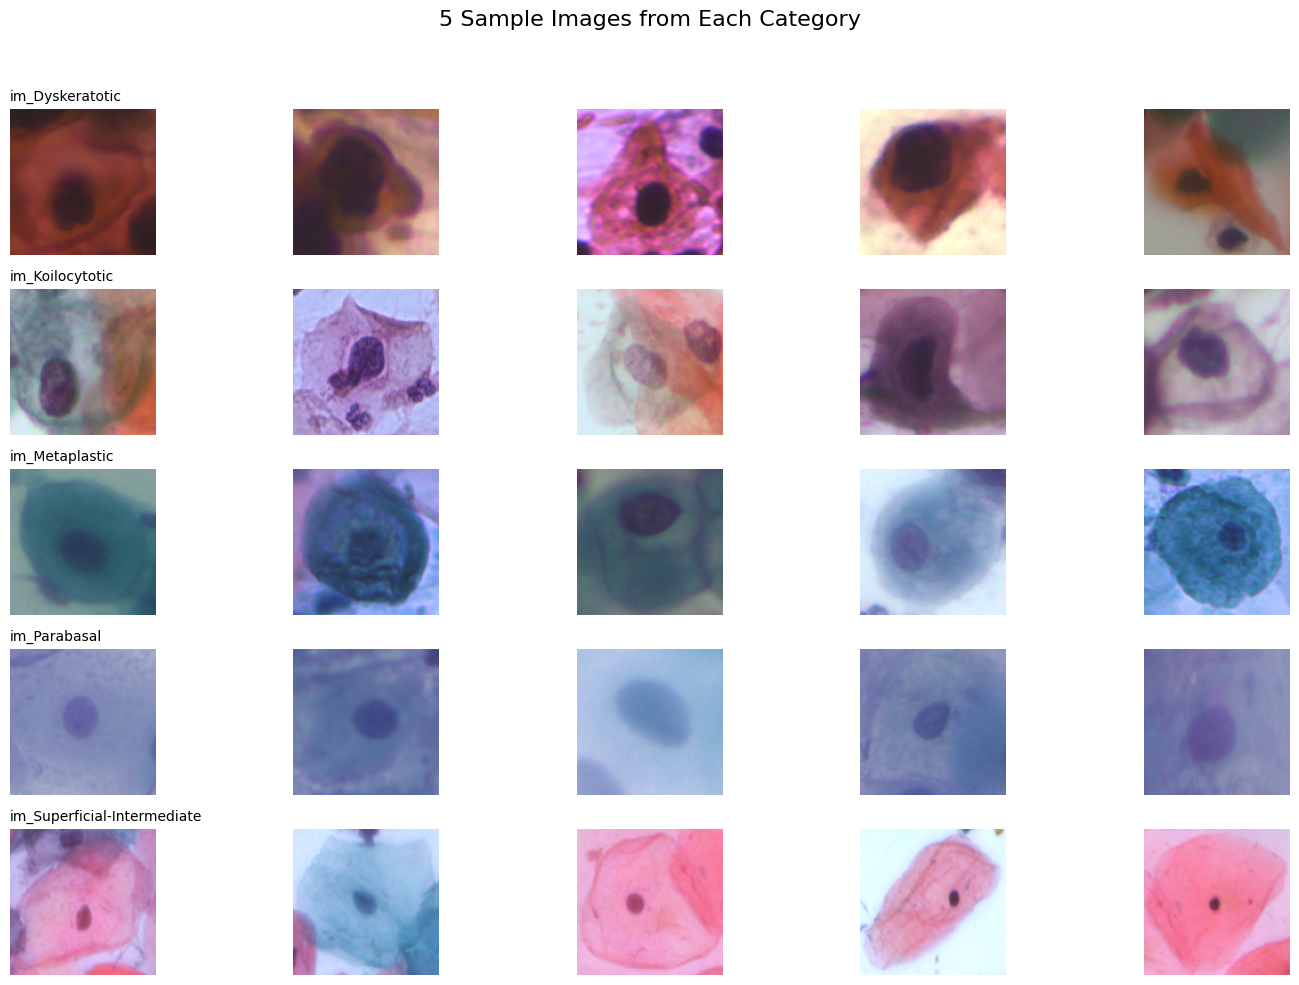

In [ ]:
num_images = 5

fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 10))
fig.suptitle("5 Sample Images from Each Category", fontsize=16)

allowed_extensions = {".bmp", ".png", ".jpg", ".jpeg"}

for i, category in enumerate(categories):
    path = os.path.join(base_dir, category, category, "CROPPED")
    img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]
    img_names = img_names[:num_images]  # Get the first 5 images
    for j, img_name in enumerate(img_names):
        img_path = os.path.join(path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            print(np.array(img).shape)
            img = img.resize((128, 128))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category, fontsize=10, loc='left')
        except Exception as e:
            print(f"Error displaying image {img_name}: {e}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Initialize a dictionary to store counts for each category
image_counts = {category: 0 for category in categories}
total_images = 0

# Loop through each category and count the number of images
for category in categories:
    path = os.path.join(base_dir, category, category, "CROPPED")  # Assuming 'CROPPED' folder contains images
    try:
        img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]
        image_counts[category] = len(img_names)
        total_images += len(img_names)  # Add to total count
    except Exception as e:
        print(f"Error accessing folder {category}: {e}")

# Print the image counts for each category
for category, count in image_counts.items():
    print(f"Category '{category}' contains {count} images.")
# Print the total number of images
print(f"Total number of images across all categories: {total_images}")

Category 'im_Dyskeratotic' contains 813 images.
Category 'im_Koilocytotic' contains 825 images.
Category 'im_Metaplastic' contains 793 images.
Category 'im_Parabasal' contains 787 images.
Category 'im_Superficial-Intermediate' contains 831 images.
Total number of images across all categories: 4049


# CV Feature Extraction Methods
1. Histogram of Oriented Gradients (HOG)
2. Local Binary Patterns (LBP)
3. Scale-Invariant Feature Transform (SIFT)
4. Gabor Filters

## HOG

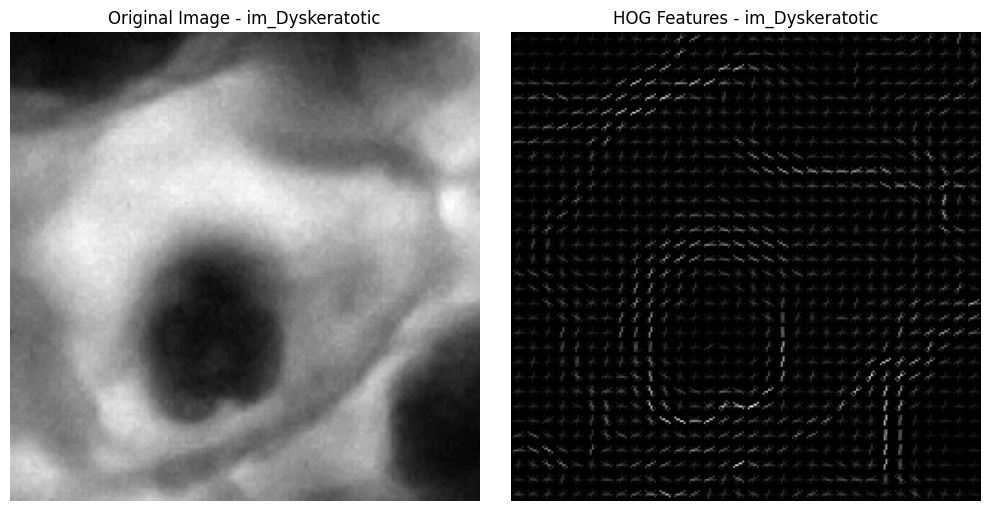

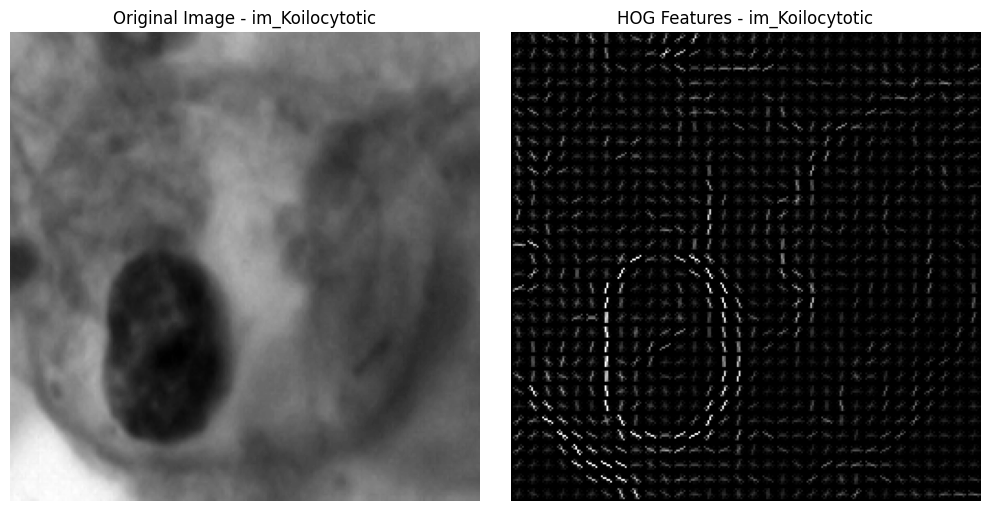

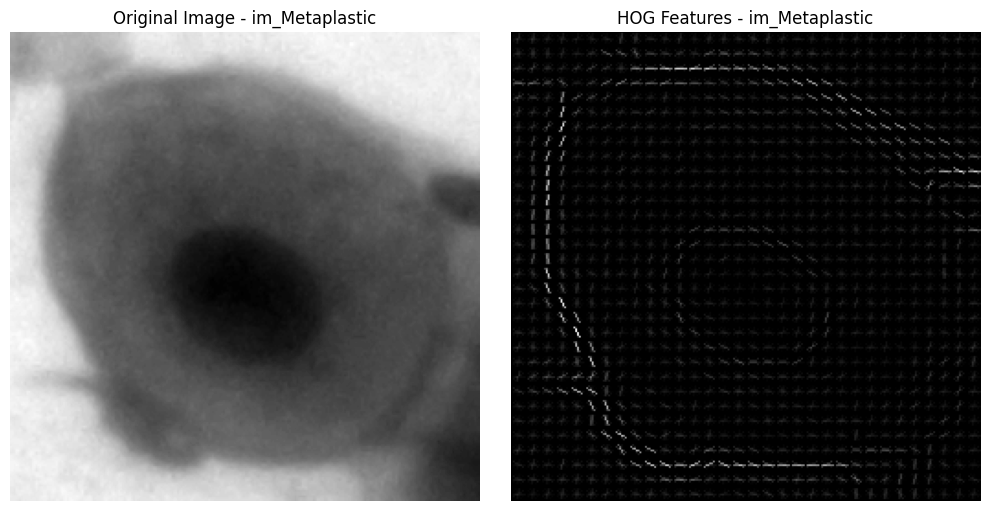

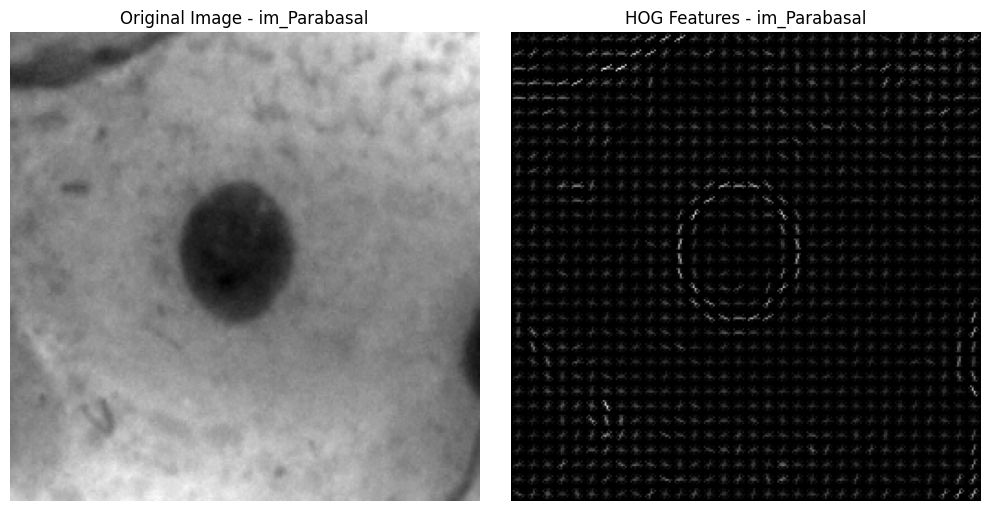

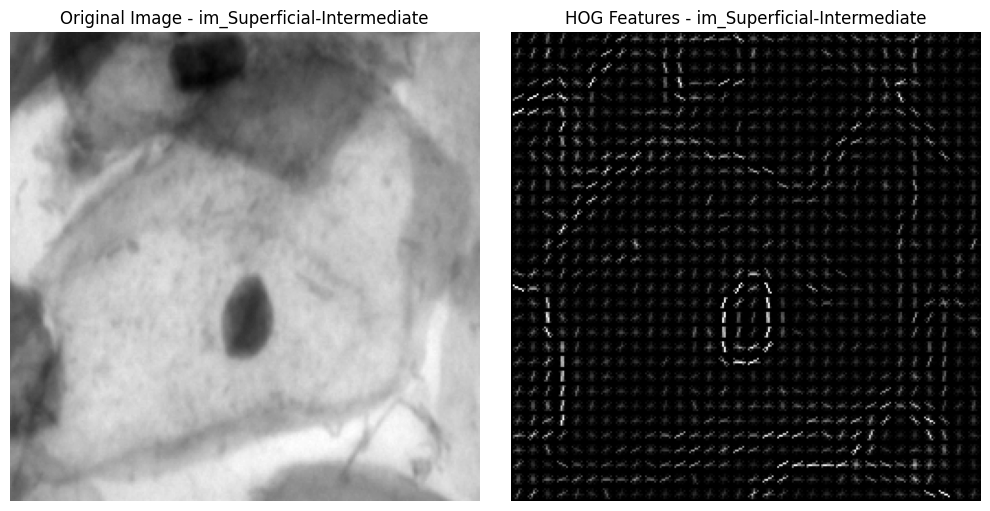

Extracted HOG features from 4049 images.


(4049, 34596)

In [ ]:
# Initialize a list to store HOG features and corresponding labels
hog_features = []
labels = []

# Function to plot HOG features for one image per category
def plot_hog_features(image, hog_image, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title(f"Original Image - {title}")

    # Rescale histogram for better display of the HOG image
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title(f"HOG Features - {title}")
    plt.show()

# Loop through each category and apply HOG to all images, while displaying one HOG example per category
for category in categories:
    path = os.path.join(base_dir, category, category, "CROPPED")
    try:
        img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]

        for idx, img_name in enumerate(img_names):
            img_path = os.path.join(path, img_name)
            try:
                # Load the image, convert to grayscale, and resize it
                img = Image.open(img_path).convert('RGB')
                img = img.resize((128, 128))  # Resize to 128x128 or any size you prefer
                gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

                # Compute HOG features without the multichannel parameter
                hog_feature, hog_image = hog(gray_img, pixels_per_cell=(8, 8),
                                             cells_per_block=(2, 2), visualize=True)

                # Append HOG features and labels for all images
                hog_features.append(hog_feature.flatten())
                labels.append(category)

                # Display HOG for only the first image in each category
                if idx == 0:
                    plot_hog_features(gray_img, hog_image, category)

            except Exception as e:
                print(f"Error processing image {img_name}: {e}")

    except Exception as e:
        print(f"Error accessing folder {category}: {e}")

# Convert the list of HOG features and labels into numpy arrays
hog_features = np.array(hog_features)
labels = np.array(labels)

print(f"Extracted HOG features from {len(hog_features)} images.")
hog_features.shape

## LBP

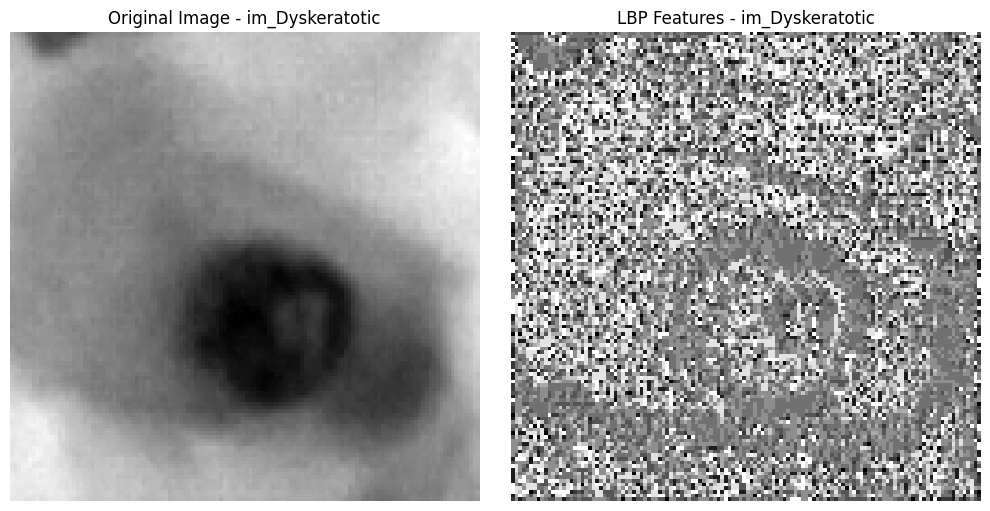

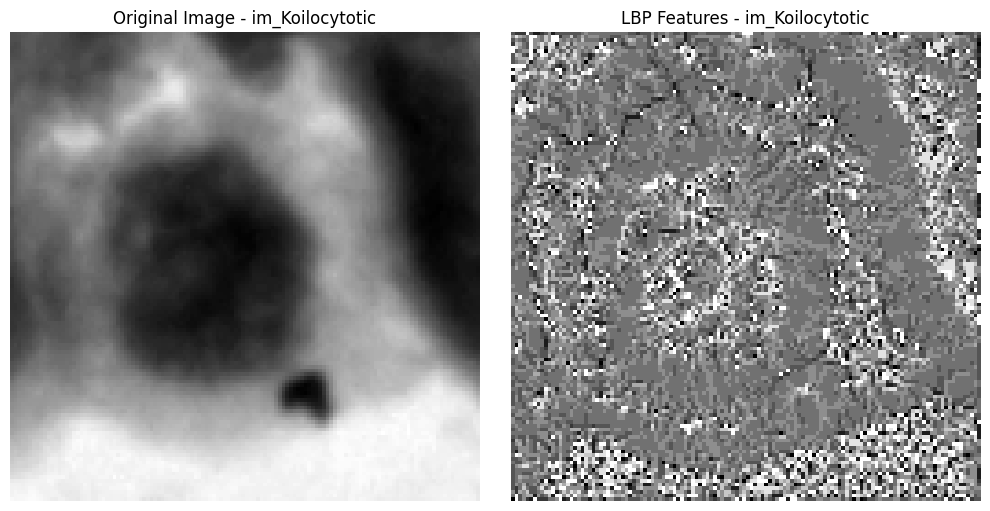

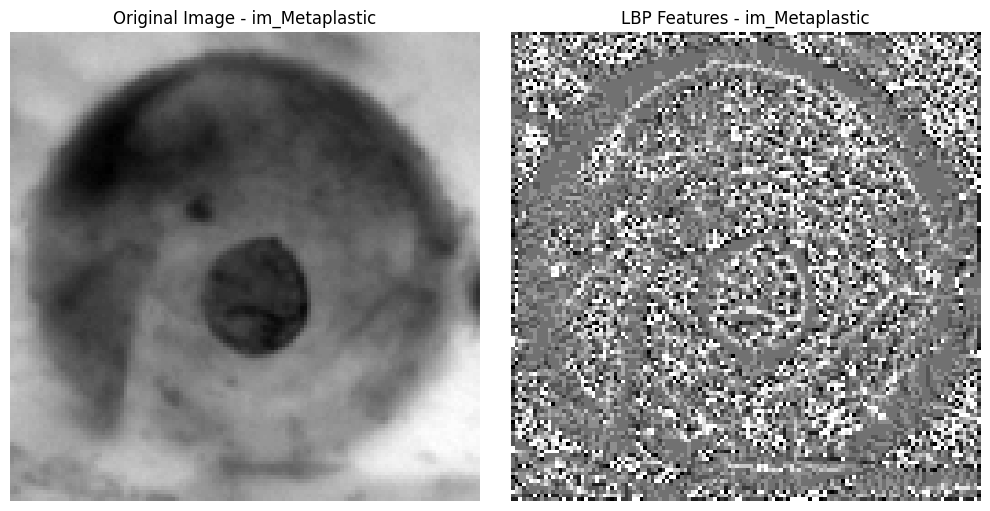

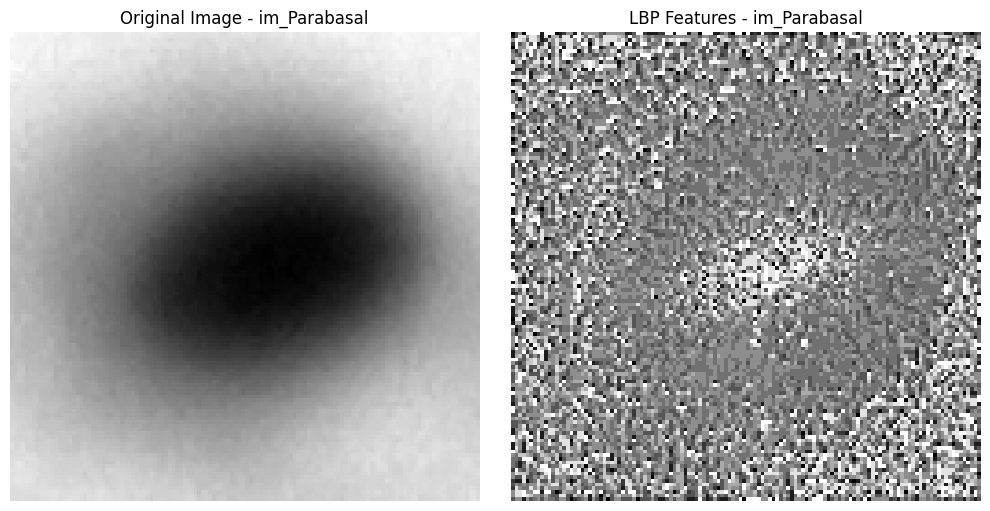

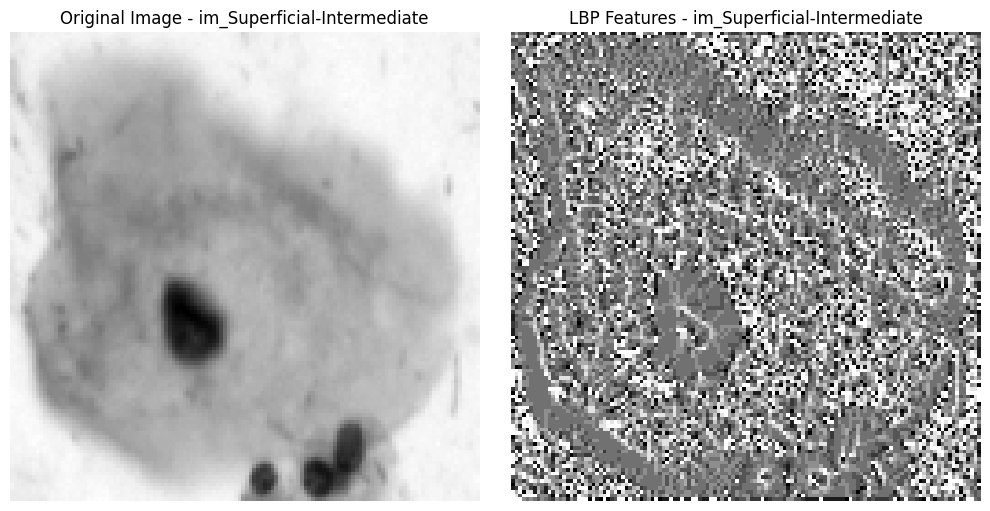

Extracted LBP features from 4049 images.


In [ ]:
# Parameters for LBP
radius = 1  # LBP radius
n_points = 8 * radius  # Number of points to consider in LBP

# Initialize a list to store LBP features and corresponding labels
lbp_features = []
labels = []

# Function to plot LBP features for one image per category
def plot_lbp_features(image, lbp_image, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title(f"Original Image - {title}")

    # Rescale for better contrast
    lbp_image_rescaled = exposure.rescale_intensity(lbp_image, in_range=(0, lbp_image.max()))

    ax2.axis('off')
    ax2.imshow(lbp_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title(f"LBP Features - {title}")
    plt.show()

# Loop through each category and apply LBP to all images, while displaying one LBP example per category
for category in categories:
    path = os.path.join(base_dir, category, category, "CROPPED")
    try:
        img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]

        for idx, img_name in enumerate(img_names):
            img_path = os.path.join(path, img_name)
            try:
                # Load the image, convert to grayscale, and resize it
                img = Image.open(img_path).convert('RGB')
                img = img.resize((128, 128))  # Resize to 128x128 or any size you prefer
                gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

                # Compute LBP features
                lbp_image = local_binary_pattern(gray_img, n_points, radius, method="uniform")

                # Create LBP histogram (feature vector)
                n_bins = int(lbp_image.max() + 1)
                lbp_hist, _ = np.histogram(lbp_image, bins=n_bins, range=(0, n_bins), density=True)

                # Append LBP features and labels for all images
                lbp_features.append(lbp_hist)
                labels.append(category)

                # Display LBP for only the first image in each category
                if idx == 0:
                    plot_lbp_features(gray_img, lbp_image, category)

            except Exception as e:
                print(f"Error processing image {img_name}: {e}")

    except Exception as e:
        print(f"Error accessing folder {category}: {e}")

# Convert the list of LBP features and labels into numpy arrays
lbp_features = np.array(lbp_features)
labels = np.array(labels)

print(f"Extracted LBP features from {len(lbp_features)} images.")

## SIFT

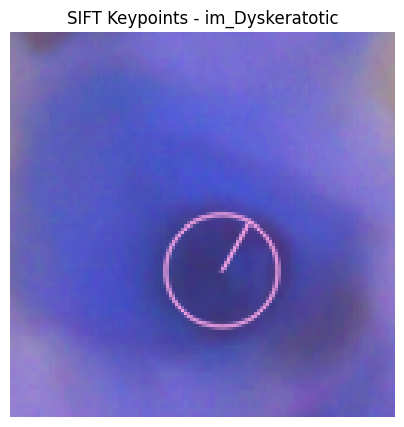

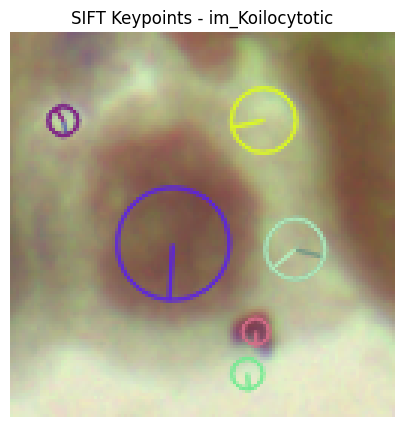

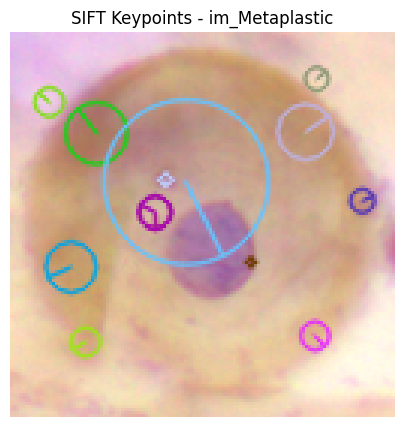

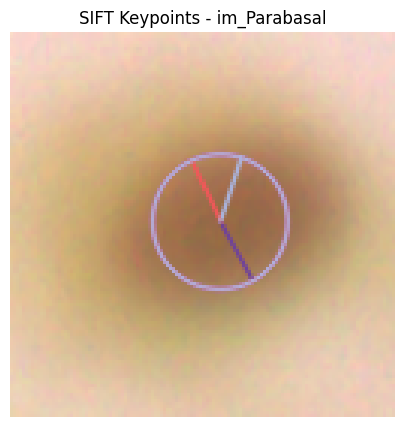

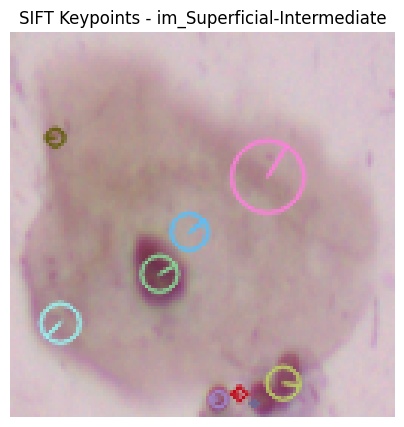

Extracted SIFT features from 3901 images.


In [ ]:
# Initialize a list to store SIFT features (descriptors) and corresponding labels
sift_features = []
labels = []

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Function to plot SIFT keypoints for one image per category
def plot_sift_keypoints(image, keypoints, title):
    # Draw keypoints on the image
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Convert the image to RGB format for displaying using Matplotlib
    img_with_keypoints_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(img_with_keypoints_rgb)
    plt.title(f"SIFT Keypoints - {title}")
    plt.axis('off')
    plt.show()

# Loop through each category and apply SIFT to all images, while displaying SIFT keypoints for one image per category
for category in categories:
    path = os.path.join(base_dir, category, category, "CROPPED")
    try:
        img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]

        for idx, img_name in enumerate(img_names):
            img_path = os.path.join(path, img_name)
            try:
                # Load the image, convert to grayscale, and resize it
                img = Image.open(img_path).convert('RGB')
                img = img.resize((128, 128))  # Resize to 128x128 or any size you prefer
                gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

                # Compute SIFT keypoints and descriptors
                keypoints, descriptors = sift.detectAndCompute(gray_img, None)

                # Append SIFT descriptors and labels for all images
                if descriptors is not None:
                    sift_features.append(descriptors)  # Keep the descriptors as they are (without flattening)
                    labels.append(category)

                # Display SIFT keypoints for only the first image in each category
                if idx == 0:
                    plot_sift_keypoints(np.array(img), keypoints, category)

            except Exception as e:
                print(f"Error processing image {img_name}: {e}")

    except Exception as e:
        print(f"Error accessing folder {category}: {e}")

# SIFT features are stored as a list of descriptor arrays (not converted to a single numpy array)
print(f"Extracted SIFT features from {len(sift_features)} images.")

## Gabor Filters

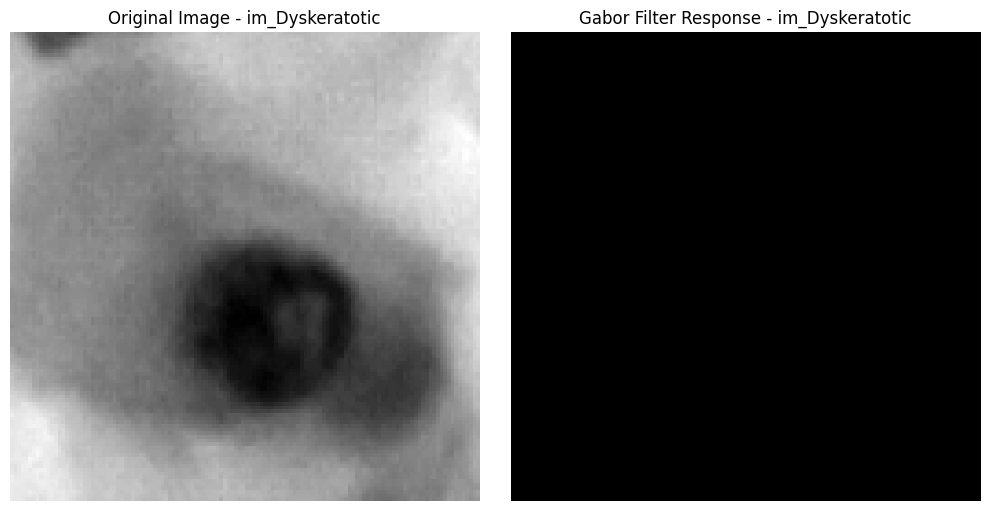

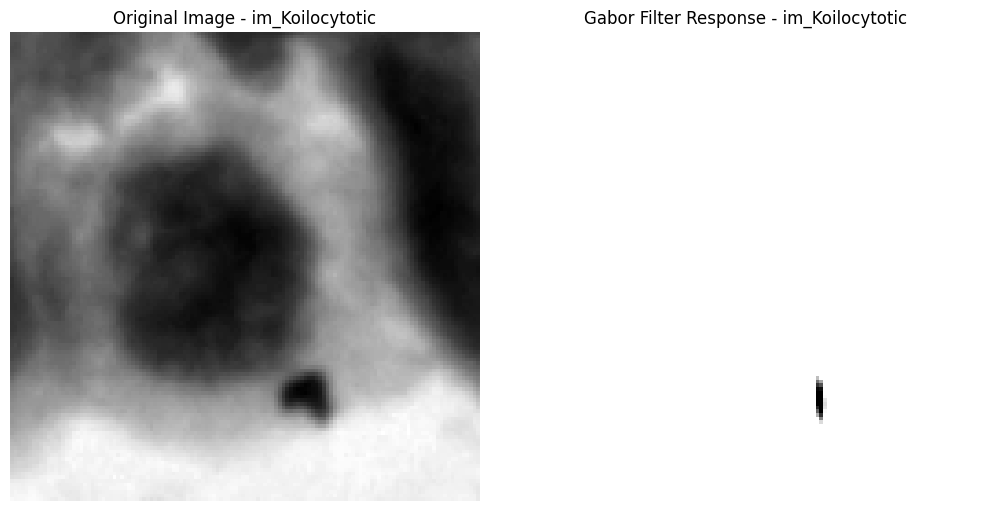

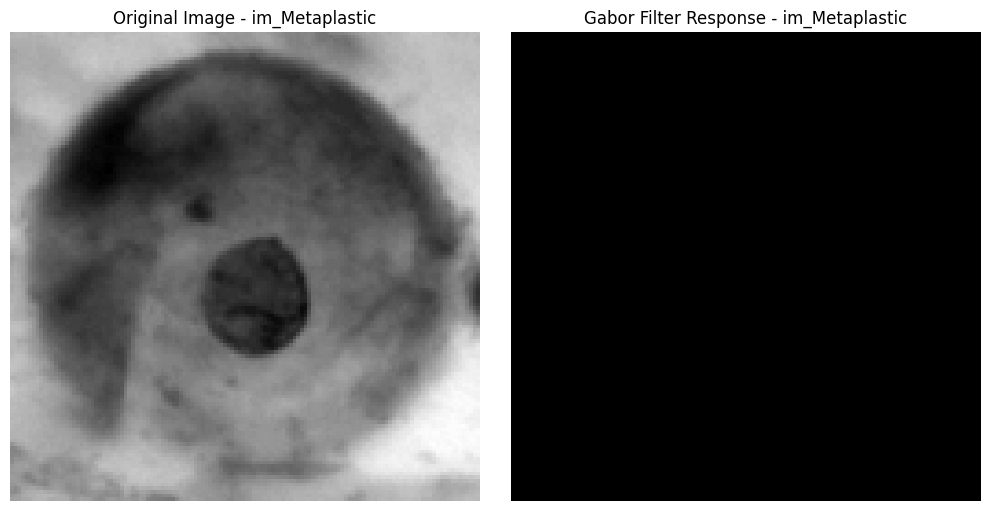

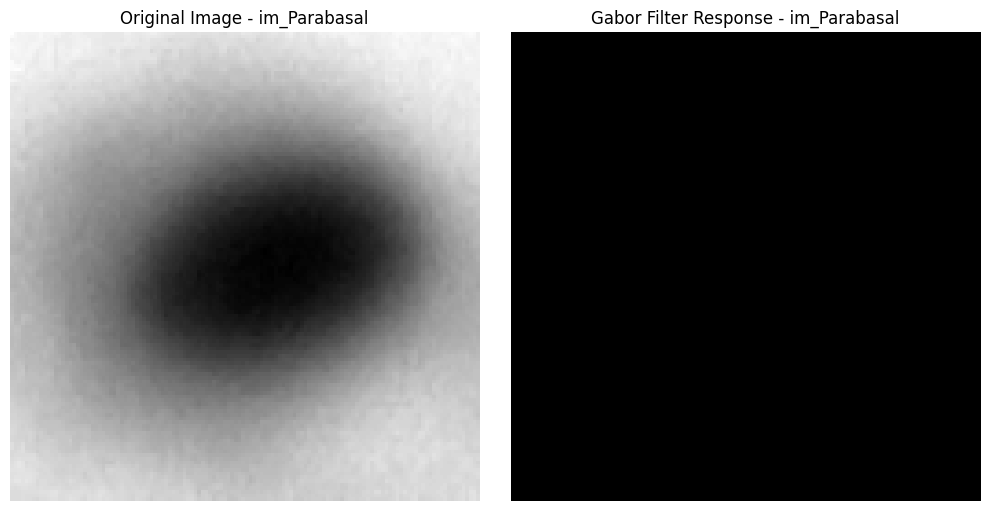

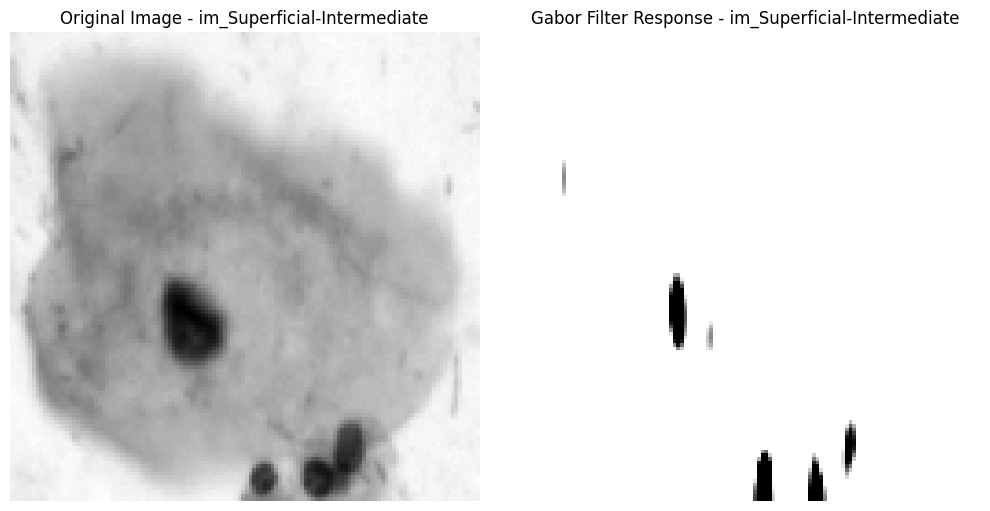

Extracted Gabor filter features from 4049 images.


In [ ]:
# Function to create a Gabor filter
def create_gabor_filter(ksize=31, sigma=4.0, theta=0, lambd=10.0, gamma=0.5, psi=0):
    return cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# Function to apply a Gabor filter to an image
def apply_gabor_filter(image, gabor_filter):
    return cv2.filter2D(image, cv2.CV_8UC3, gabor_filter)

# Function to plot Gabor responses for one image per category
def plot_gabor_response(image, gabor_response, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title(f"Original Image - {title}")

    ax2.axis('off')
    ax2.imshow(gabor_response, cmap=plt.cm.gray)
    ax2.set_title(f"Gabor Filter Response - {title}")
    plt.show()

# Parameters for Gabor filter
gabor_filter = create_gabor_filter()  # Create a Gabor filter with default parameters

# Initialize a list to store Gabor filter responses and corresponding labels
gabor_features = []
labels = []

# Loop through each category and apply Gabor filters to all images, while displaying Gabor responses for one image per category
for category in categories:
    path = os.path.join(base_dir, category, category, "CROPPED")
    try:
        img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]

        for idx, img_name in enumerate(img_names):
            img_path = os.path.join(path, img_name)
            try:
                # Load the image, convert to grayscale, and resize it
                img = Image.open(img_path).convert('RGB')
                img = img.resize((128, 128))  # Resize to 128x128 or any size you prefer
                gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

                # Apply the Gabor filter to the grayscale image
                gabor_response = apply_gabor_filter(gray_img, gabor_filter)

                # Flatten the Gabor response to create a feature vector
                gabor_feature = gabor_response.flatten()

                # Append Gabor filter responses and labels for all images
                gabor_features.append(gabor_feature)
                labels.append(category)

                # Display Gabor filter response for only the first image in each category
                if idx == 0:
                    plot_gabor_response(gray_img, gabor_response, category)

            except Exception as e:
                print(f"Error processing image {img_name}: {e}")

    except Exception as e:
        print(f"Error accessing folder {category}: {e}")

# Convert the list of Gabor filter features and labels into numpy arrays
gabor_features = np.array(gabor_features)
labels = np.array(labels)

print(f"Extracted Gabor filter features from {len(gabor_features)} images.")

# ML Classifiers
1. Logistic Regression
2. Random Forest
3. SVM
4. KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize lists to store valid SIFT features and corresponding labels
valid_sift_features = []
valid_labels = []

# Filter out the invalid SIFT features (e.g., if SIFT descriptors are None or empty)
for i in range(len(sift_features)):
    if sift_features[i] is not None and len(sift_features[i]) > 0:
        valid_sift_features.append(sift_features[i])  # Append valid SIFT features
        valid_labels.append(labels[i])  # Append the corresponding label

# Now valid_sift_features and valid_labels are aligned
print(f"Number of valid SIFT feature vectors: {len(valid_sift_features)}")
print(f"Number of valid labels: {len(valid_labels)}")

# Proceed with the rest of the process (e.g., applying PCA, splitting into train/test sets)
# Flattening or averaging features as needed, and then applying PCA:
all_sift_descriptors = np.vstack(valid_sift_features)  # Concatenate valid SIFT descriptors

# Apply PCA on the valid SIFT descriptors
pca = PCA(n_components=100)
reduced_sift_descriptors = pca.fit_transform(all_sift_descriptors)

# Map the PCA-reduced features back to each image (as done earlier)
sift_start_idx = 0
sift_pca_features = []
for descriptors in valid_sift_features:
    num_descriptors = descriptors.shape[0]
    image_pca_feature = reduced_sift_descriptors[sift_start_idx:sift_start_idx + num_descriptors].mean(axis=0)
    sift_pca_features.append(image_pca_feature)
    sift_start_idx += num_descriptors

# Convert to numpy array
sift_pca_features = np.array(sift_pca_features)

Number of valid SIFT feature vectors: 3901
Number of valid labels: 3901


In [ ]:
for feature_name, features in feature_vectors.items():
    # Debugging: Print the shape of features and labels
    print(f"Feature name: {feature_name}")
    print(f"Features shape: {len(features)}")
    print(f"Labels shape: {len(labels)}")

### HOG with Logistic Regression

In [ ]:
df_results = pd.DataFrame()

In [ ]:
# Step 1: Split the HOG features and labels into training and test sets
X_train_hog, X_test_hog, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Step 2: Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

# Step 3: Train the Logistic Regression model
log_reg.fit(X_train_hog, y_train)

# Step 4: Make predictions on the test set
y_pred_hog = log_reg.predict(X_test_hog)

# Step 5: Evaluate the accuracy of the model
accuracy_hog_logistic = accuracy_score(y_test, y_pred_hog)
print(f"Logistic Regression Accuracy on HOG features: {accuracy_hog_logistic:.4f}")

# Step 6: Store the result in a DataFrame for later comparison
results = {'HOG': {'Logistic Regression': accuracy_hog_logistic}}
df_results = pd.DataFrame(results)
print(df_results)



Logistic Regression Accuracy on HOG features: 0.6321
                          HOG
Logistic Regression  0.632099


### HOG with Random Forest

In [ ]:
# Step 2: Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Step 3: Train the Random Forest model
rf.fit(X_train_hog, y_train)

# Step 4: Make predictions on the test set
y_pred_hog_rf = rf.predict(X_test_hog)

# Step 5: Evaluate the accuracy of the model
accuracy_hog_rf = accuracy_score(y_test, y_pred_hog_rf)
print(f"Random Forest Accuracy on HOG features: {accuracy_hog_rf:.4f}")

if 'HOG' in df_results.columns:
    df_results.loc['Random Forest', 'HOG'] = accuracy_hog_rf  # Add result for Random Forest under HOG
else:
    df_results = pd.concat([df_results, pd.DataFrame({'HOG': {'Random Forest': accuracy_hog_rf}})])
print(df_results)


Random Forest Accuracy on HOG features: 0.6272
                          HOG
Logistic Regression  0.632099
Random Forest        0.627160


### HOG with SVM

In [ ]:
# Step 2: Initialize the SVM classifier
svm = SVC()

# Step 3: Train the SVM model
svm.fit(X_train_hog, y_train)

# Step 4: Make predictions on the test set
y_pred_hog_svm = svm.predict(X_test_hog)

# Step 5: Evaluate the accuracy of the model
accuracy_hog_svm = accuracy_score(y_test, y_pred_hog_svm)
print(f"SVM Accuracy on HOG features: {accuracy_hog_svm:.4f}")

if 'HOG' in df_results.columns:
    df_results.loc['SVM', 'HOG'] = accuracy_hog_svm
else:
    df_results = pd.concat([df_results, pd.DataFrame({'HOG': {'SVM': accuracy_hog_svm}})])
print(df_results)

SVM Accuracy on HOG features: 0.6926
                          HOG
Logistic Regression  0.632099
Random Forest        0.627160
SVM                  0.692593


### HOG with KNN

In [ ]:
# Step 2: Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Step 3: Train the k-NN model
knn.fit(X_train_hog, y_train)

# Step 4: Make predictions on the test set
y_pred_hog_knn = knn.predict(X_test_hog)

# Step 5: Evaluate the accuracy of the model
accuracy_hog_knn = accuracy_score(y_test, y_pred_hog_knn)
print(f"k-NN Accuracy on HOG features: {accuracy_hog_knn:.4f}")

# Step 6: Append the result to the existing DataFrame using .loc or pd.concat
if 'HOG' in df_results.columns:
    df_results.loc['k-NN', 'HOG'] = accuracy_hog_knn  # Add result for k-NN under HOG
else:
    df_results = pd.concat([df_results, pd.DataFrame({'HOG': {'k-NN': accuracy_hog_knn}})])

# Display the updated DataFrame
print(df_results)

k-NN Accuracy on HOG features: 0.2802
                          HOG
Logistic Regression  0.632099
Random Forest        0.627160
SVM                  0.692593
k-NN                 0.280247


### LBP with Logistic Regression

In [ ]:
# Step 1: Split the LBP features and labels into training and test sets
X_train_lbp, X_test_lbp, y_train, y_test = train_test_split(lbp_features, labels, test_size=0.2, random_state=42)

# Step 2: Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Step 3: Train the Logistic Regression model
log_reg.fit(X_train_lbp, y_train)

# Step 4: Make predictions on the test set
y_pred_lbp_log = log_reg.predict(X_test_lbp)

# Step 5: Evaluate the accuracy of the model
accuracy_lbp_log = accuracy_score(y_test, y_pred_lbp_log)
print(f"Logistic Regression Accuracy on LBP features: {accuracy_lbp_log:.4f}")

# Step 6: Append the result to the existing DataFrame using .loc to avoid duplication
if 'Logistic Regression' in df_results.index:
    df_results.loc['Logistic Regression', 'LBP'] = accuracy_lbp_log  # Add/Update result for Logistic Regression under LBP
else:
    new_data = pd.DataFrame({'LBP': accuracy_lbp_log}, index=['Logistic Regression'])
    df_results = pd.concat([df_results, new_data])

# Display the updated DataFrame
print(df_results)

Logistic Regression Accuracy on LBP features: 0.5469
                          HOG       LBP
Logistic Regression  0.632099  0.546914
Random Forest        0.627160       NaN
SVM                  0.692593       NaN
k-NN                 0.280247       NaN


### LPB with Random Forest

In [ ]:
### Random Forest Classifier ###
rf = RandomForestClassifier()
rf.fit(X_train_lbp, y_train)
y_pred_lbp_rf = rf.predict(X_test_lbp)
accuracy_lbp_rf = accuracy_score(y_test, y_pred_lbp_rf)
print(f"Random Forest Accuracy on LBP features: {accuracy_lbp_rf:.4f}")

# Update the DataFrame for Random Forest
if 'Random Forest' in df_results.index:
    df_results.loc['Random Forest', 'LBP'] = accuracy_lbp_rf
else:
    new_data_rf = pd.DataFrame({'LBP': accuracy_lbp_rf}, index=['Random Forest'])
    df_results = pd.concat([df_results, new_data_rf])

# Display the updated DataFrame
print(df_results)

Random Forest Accuracy on LBP features: 0.6642
                          HOG       LBP
Logistic Regression  0.632099  0.546914
Random Forest        0.627160  0.664198
SVM                  0.692593       NaN
k-NN                 0.280247       NaN


### LPB with SVM

In [ ]:
### SVM Classifier ###
svm = SVC()
svm.fit(X_train_lbp, y_train)
y_pred_lbp_svm = svm.predict(X_test_lbp)
accuracy_lbp_svm = accuracy_score(y_test, y_pred_lbp_svm)
print(f"SVM Accuracy on LBP features: {accuracy_lbp_svm:.4f}")

# Update the DataFrame for SVM
if 'SVM' in df_results.index:
    df_results.loc['SVM', 'LBP'] = accuracy_lbp_svm
else:
    new_data_svm = pd.DataFrame({'LBP': accuracy_lbp_svm}, index=['SVM'])
    df_results = pd.concat([df_results, new_data_svm])
print(df_results)

SVM Accuracy on LBP features: 0.6296
                          HOG       LBP
Logistic Regression  0.632099  0.546914
Random Forest        0.627160  0.664198
SVM                  0.692593  0.629630
k-NN                 0.280247       NaN


### LPB with KNN

In [ ]:
### k-NN Classifier ###
knn = KNeighborsClassifier()
knn.fit(X_train_lbp, y_train)
y_pred_lbp_knn = knn.predict(X_test_lbp)
accuracy_lbp_knn = accuracy_score(y_test, y_pred_lbp_knn)
print(f"k-NN Accuracy on LBP features: {accuracy_lbp_knn:.4f}")

# Update the DataFrame for k-NN
if 'k-NN' in df_results.index:
    df_results.loc['k-NN', 'LBP'] = accuracy_lbp_knn
else:
    new_data_knn = pd.DataFrame({'LBP': accuracy_lbp_knn}, index=['k-NN'])
    df_results = pd.concat([df_results, new_data_knn])
print(df_results)

k-NN Accuracy on LBP features: 0.6358
                          HOG       LBP
Logistic Regression  0.632099  0.546914
Random Forest        0.627160  0.664198
SVM                  0.692593  0.629630
k-NN                 0.280247  0.635802


### SIFT with Logistic Regression

In [ ]:
# Split the valid SIFT features and valid labels into training and test sets
X_train_sift, X_test_sift, y_train, y_test = train_test_split(sift_pca_features, valid_labels, test_size=0.2, random_state=42)

### Logistic Regression Classifier ###
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sift, y_train)
y_pred_sift_log = log_reg.predict(X_test_sift)
accuracy_sift_log = accuracy_score(y_test, y_pred_sift_log)
print(f"Logistic Regression Accuracy on SIFT features: {accuracy_sift_log:.4f}")

# Update the DataFrame for Logistic Regression
if 'Logistic Regression' in df_results.index:
    df_results.loc['Logistic Regression', 'SIFT'] = accuracy_sift_log
else:
    new_data_log = pd.DataFrame({'SIFT': accuracy_sift_log}, index=['Logistic Regression'])
    df_results = pd.concat([df_results, new_data_log])
print(df_results)


Logistic Regression Accuracy on SIFT features: 0.4725
                          HOG       LBP      SIFT
Logistic Regression  0.632099  0.546914  0.472471
Random Forest        0.627160  0.664198       NaN
SVM                  0.692593  0.629630       NaN
k-NN                 0.280247  0.635802       NaN


### SIFT with Random Forest

In [ ]:
### Random Forest Classifier ###
rf = RandomForestClassifier()
rf.fit(X_train_sift, y_train)
y_pred_sift_rf = rf.predict(X_test_sift)
accuracy_sift_rf = accuracy_score(y_test, y_pred_sift_rf)
print(f"Random Forest Accuracy on SIFT features: {accuracy_sift_rf:.4f}")

# Update the DataFrame for Random Forest
if 'Random Forest' in df_results.index:
    df_results.loc['Random Forest', 'SIFT'] = accuracy_sift_rf
else:
    new_data_rf = pd.DataFrame({'SIFT': accuracy_sift_rf}, index=['Random Forest'])
    df_results = pd.concat([df_results, new_data_rf])
print(df_results)

Random Forest Accuracy on SIFT features: 0.5391
                          HOG       LBP      SIFT
Logistic Regression  0.632099  0.546914  0.472471
Random Forest        0.627160  0.664198  0.539052
SVM                  0.692593  0.629630       NaN
k-NN                 0.280247  0.635802       NaN


### SIFT with SVM

In [ ]:
### SVM Classifier ###
svm = SVC()
svm.fit(X_train_sift, y_train)
y_pred_sift_svm = svm.predict(X_test_sift)
accuracy_sift_svm = accuracy_score(y_test, y_pred_sift_svm)
print(f"SVM Accuracy on SIFT features: {accuracy_sift_svm:.4f}")

# Update the DataFrame for SVM
if 'SVM' in df_results.index:
    df_results.loc['SVM', 'SIFT'] = accuracy_sift_svm
else:
    new_data_svm = pd.DataFrame({'SIFT': accuracy_sift_svm}, index=['SVM'])
    df_results = pd.concat([df_results, new_data_svm])
print(df_results)

SVM Accuracy on SIFT features: 0.5339
                          HOG       LBP      SIFT
Logistic Regression  0.632099  0.546914  0.472471
Random Forest        0.627160  0.664198  0.539052
SVM                  0.692593  0.629630  0.533931
k-NN                 0.280247  0.635802       NaN


### SIFT with KNN

In [ ]:
### k-NN Classifier ###
knn = KNeighborsClassifier()
knn.fit(X_train_sift, y_train)
y_pred_sift_knn = knn.predict(X_test_sift)
accuracy_sift_knn = accuracy_score(y_test, y_pred_sift_knn)
print(f"k-NN Accuracy on SIFT features: {accuracy_sift_knn:.4f}")

# Update the DataFrame for k-NN
if 'k-NN' in df_results.index:
    df_results.loc['k-NN', 'SIFT'] = accuracy_sift_knn
else:
    new_data_knn = pd.DataFrame({'SIFT': accuracy_sift_knn}, index=['k-NN'])
    df_results = pd.concat([df_results, new_data_knn])
print(df_results)

k-NN Accuracy on SIFT features: 0.4673
                          HOG       LBP      SIFT
Logistic Regression  0.632099  0.546914  0.472471
Random Forest        0.627160  0.664198  0.539052
SVM                  0.692593  0.629630  0.533931
k-NN                 0.280247  0.635802  0.467350


### Gabor Filters with Logistic Regression

In [ ]:
# Split the Gabor features and labels into training and test sets
X_train_gabor, X_test_gabor, y_train, y_test = train_test_split(gabor_features, labels, test_size=0.2, random_state=42)

### Logistic Regression Classifier ###
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_gabor, y_train)
y_pred_gabor_log = log_reg.predict(X_test_gabor)
accuracy_gabor_log = accuracy_score(y_test, y_pred_gabor_log)
print(f"Logistic Regression Accuracy on Gabor features: {accuracy_gabor_log:.4f}")

# Update the DataFrame for Logistic Regression
if 'Logistic Regression' in df_results.index:
    df_results.loc['Logistic Regression', 'Gabor'] = accuracy_gabor_log
else:
    new_data_log = pd.DataFrame({'Gabor': accuracy_gabor_log}, index=['Logistic Regression'])
    df_results = pd.concat([df_results, new_data_log])
print(df_results)

Logistic Regression Accuracy on Gabor features: 0.3704
                          HOG       LBP      SIFT    Gabor
Logistic Regression  0.632099  0.546914  0.472471  0.37037
Random Forest        0.627160  0.664198  0.539052      NaN
SVM                  0.692593  0.629630  0.533931      NaN
k-NN                 0.280247  0.635802  0.467350      NaN


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Gabor Filters with Random Forest

In [ ]:
### Random Forest Classifier ###
rf = RandomForestClassifier()
rf.fit(X_train_gabor, y_train)
y_pred_gabor_rf = rf.predict(X_test_gabor)
accuracy_gabor_rf = accuracy_score(y_test, y_pred_gabor_rf)
print(f"Random Forest Accuracy on Gabor features: {accuracy_gabor_rf:.4f}")

# Update the DataFrame for Random Forest
if 'Random Forest' in df_results.index:
    df_results.loc['Random Forest', 'Gabor'] = accuracy_gabor_rf
else:
    new_data_rf = pd.DataFrame({'Gabor': accuracy_gabor_rf}, index=['Random Forest'])
    df_results = pd.concat([df_results, new_data_rf])
print(df_results)

Random Forest Accuracy on Gabor features: 0.4049
                          HOG       LBP      SIFT     Gabor
Logistic Regression  0.632099  0.546914  0.472471  0.370370
Random Forest        0.627160  0.664198  0.539052  0.404938
SVM                  0.692593  0.629630  0.533931       NaN
k-NN                 0.280247  0.635802  0.467350       NaN


### Gabor Filters with SVM

In [ ]:
### SVM Classifier ###
svm = SVC()
svm.fit(X_train_gabor, y_train)
y_pred_gabor_svm = svm.predict(X_test_gabor)
accuracy_gabor_svm = accuracy_score(y_test, y_pred_gabor_svm)
print(f"SVM Accuracy on Gabor features: {accuracy_gabor_svm:.4f}")

# Update the DataFrame for SVM
if 'SVM' in df_results.index:
    df_results.loc['SVM', 'Gabor'] = accuracy_gabor_svm
else:
    new_data_svm = pd.DataFrame({'Gabor': accuracy_gabor_svm}, index=['SVM'])
    df_results = pd.concat([df_results, new_data_svm])
print(df_results)


SVM Accuracy on Gabor features: 0.3432
                          HOG       LBP      SIFT     Gabor
Logistic Regression  0.632099  0.546914  0.472471  0.370370
Random Forest        0.627160  0.664198  0.539052  0.404938
SVM                  0.692593  0.629630  0.533931  0.343210
k-NN                 0.280247  0.635802  0.467350       NaN


### Gabor Filters with KNN

In [ ]:
### k-NN Classifier ###
knn = KNeighborsClassifier()
knn.fit(X_train_gabor, y_train)
y_pred_gabor_knn = knn.predict(X_test_gabor)
accuracy_gabor_knn = accuracy_score(y_test, y_pred_gabor_knn)
print(f"k-NN Accuracy on Gabor features: {accuracy_gabor_knn:.4f}")

# Update the DataFrame for k-NN
if 'k-NN' in df_results.index:
    df_results.loc['k-NN', 'Gabor'] = accuracy_gabor_knn
else:
    new_data_knn = pd.DataFrame({'Gabor': accuracy_gabor_knn}, index=['k-NN'])
    df_results = pd.concat([df_results, new_data_knn])
print(df_results)

k-NN Accuracy on Gabor features: 0.3247
                          HOG       LBP      SIFT     Gabor
Logistic Regression  0.632099  0.546914  0.472471  0.370370
Random Forest        0.627160  0.664198  0.539052  0.404938
SVM                  0.692593  0.629630  0.533931  0.343210
k-NN                 0.280247  0.635802  0.467350  0.324691


# DL Models

## AlexNet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 147MB/s]


Epoch 1/10, Loss: 132.6546, Accuracy: 51.74%
Epoch 2/10, Loss: 124.5308, Accuracy: 50.85%
Epoch 3/10, Loss: 109.1021, Accuracy: 57.43%
Epoch 4/10, Loss: 82.5392, Accuracy: 70.73%
Epoch 5/10, Loss: 98.9443, Accuracy: 68.94%
Epoch 6/10, Loss: 97.3584, Accuracy: 69.99%
Epoch 7/10, Loss: 77.5061, Accuracy: 74.56%
Epoch 8/10, Loss: 56.7415, Accuracy: 82.15%
Epoch 9/10, Loss: 46.2277, Accuracy: 85.89%
Epoch 10/10, Loss: 62.4650, Accuracy: 81.48%
Accuracy: 0.8099
Precision: 0.8303
Recall: 0.8099
F1 Score: 0.8033


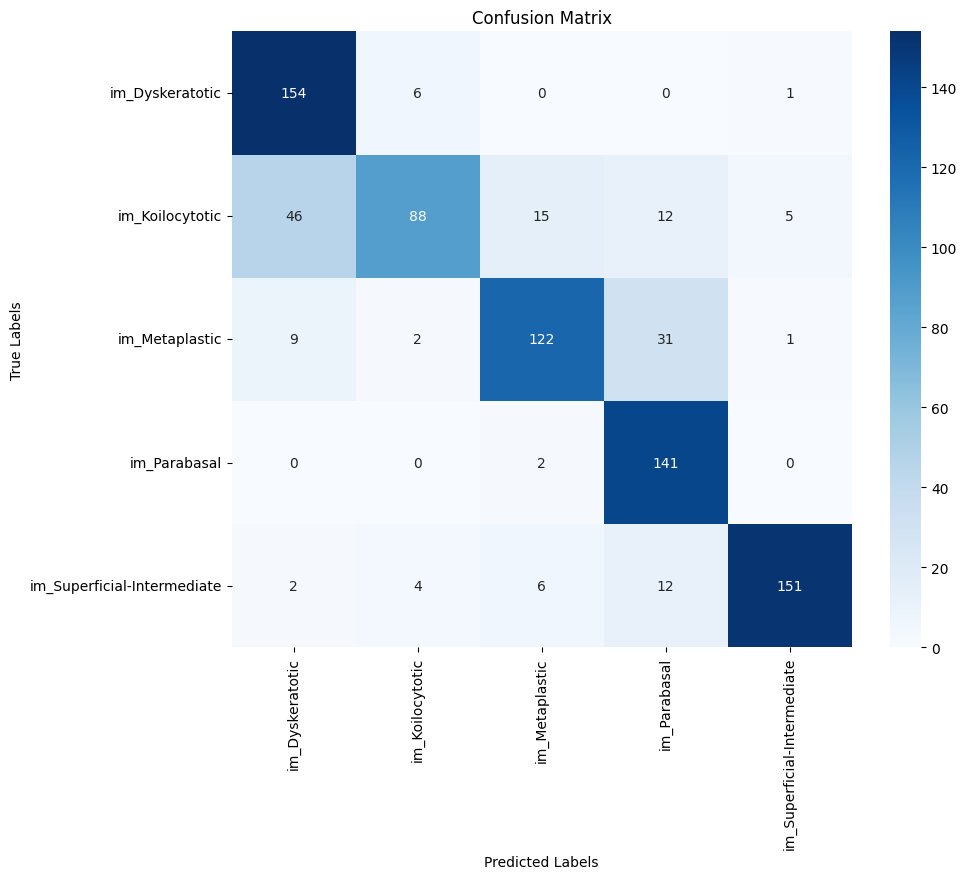

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import models, transforms
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define your custom dataset class
class CervicalDataset(Dataset):
    def __init__(self, base_dir, categories, transform=None):
        self.base_dir = base_dir
        self.categories = categories
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Load all image paths and labels
        for idx, category in enumerate(categories):
            category_path = os.path.join(base_dir, category, category, "CROPPED")
            for img_name in os.listdir(category_path):
                if os.path.splitext(img_name)[-1].lower() in allowed_extensions:
                    self.image_paths.append(os.path.join(category_path, img_name))
                    self.labels.append(idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)
        return img, label

# Define image transformations (resize to 227x227 and normalize)
transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = CervicalDataset(base_dir='/content/dataset', categories=categories, transform=transform)

# Split dataset into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load AlexNet pre-trained model and modify classifier
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, len(categories))  # Adjust for number of categories
alexnet = alexnet.cuda()  # Move model to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

# Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return model

# Train the model
trained_model = train_model(alexnet, train_dataloader, criterion, optimizer)

# Evaluation function to compute metrics and confusion matrix
def evaluate_model(model, dataloader, categories):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Evaluate the trained model on the test set
evaluate_model(trained_model, test_dataloader, categories)




## VGG19

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 68.9MB/s]


Epoch 1/10, Loss: 150.8910, Accuracy: 34.49%
Epoch 2/10, Loss: 100.9929, Accuracy: 58.72%
Epoch 3/10, Loss: 88.7989, Accuracy: 66.44%
Epoch 4/10, Loss: 79.0694, Accuracy: 71.69%
Epoch 5/10, Loss: 72.0913, Accuracy: 75.64%
Epoch 6/10, Loss: 68.5056, Accuracy: 77.80%
Epoch 7/10, Loss: 59.4982, Accuracy: 80.09%
Epoch 8/10, Loss: 53.3071, Accuracy: 82.80%
Epoch 9/10, Loss: 57.0522, Accuracy: 80.02%
Epoch 10/10, Loss: 48.2866, Accuracy: 83.27%
Accuracy: 0.7284
Precision: 0.7541
Recall: 0.7284
F1 Score: 0.7150


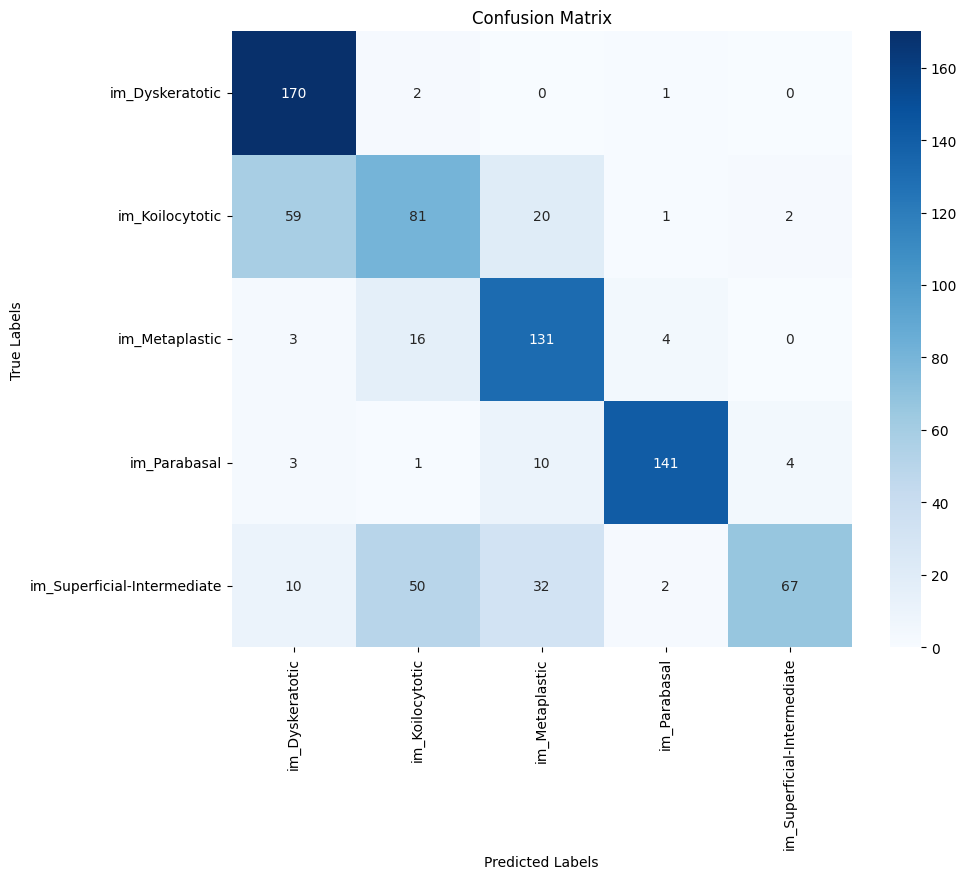

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import models, transforms
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define your custom dataset class
class CervicalDataset(Dataset):
    def __init__(self, base_dir, categories, transform=None):
        self.base_dir = base_dir
        self.categories = categories
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Load all image paths and labels
        for idx, category in enumerate(categories):
            category_path = os.path.join(base_dir, category, category, "CROPPED")
            for img_name in os.listdir(category_path):
                if os.path.splitext(img_name)[-1].lower() in allowed_extensions:
                    self.image_paths.append(os.path.join(category_path, img_name))
                    self.labels.append(idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)
        return img, label

# Define image transformations (resize to 224x224 for VGG)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG-19 requires 224x224 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset and split into train and test sets
dataset = CervicalDataset(base_dir='/content/dataset', categories=categories, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load VGG-19 pre-trained model and modify classifier
vgg19 = models.vgg19(pretrained=True)
vgg19.classifier[6] = nn.Linear(4096, len(categories))  # Adjust for the number of classes
vgg19 = vgg19.cuda()  # Move model to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg19.parameters(), lr=0.001)

# Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return model

# Train the model
trained_model = train_model(vgg19, train_dataloader, criterion, optimizer)

# Evaluation function to compute metrics and confusion matrix
def evaluate_model(model, dataloader, categories):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Evaluate the trained model on the test set
evaluate_model(trained_model, test_dataloader, categories)



## ResNet

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
import os
import numpy as np

# Define your custom dataset class
class CervicalDataset(Dataset):
    def __init__(self, base_dir, categories, transform=None):
        self.base_dir = base_dir
        self.categories = categories
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Load all image paths and labels
        for idx, category in enumerate(categories):
            category_path = os.path.join(base_dir, category, category, "CROPPED")
            for img_name in os.listdir(category_path):
                if os.path.splitext(img_name)[-1].lower() in allowed_extensions:
                    self.image_paths.append(os.path.join(category_path, img_name))
                    self.labels.append(idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)
        return img, label

# Define image transformations (resize to 227x227 and normalize)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = CervicalDataset(base_dir='/content/dataset', categories=categories, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Load AlexNet pre-trained model and modify classifier
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, len(categories))  # Adjust for 5 classes
alexnet = alexnet.cuda()  # Move model to GPU

resnet = models.resnet50(pretrained=True)


class ResNet(nn.Module):
  def __init__(self, )

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

# Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return model

# Train the model
trained_model = train_model(alexnet, dataloader, criterion, optimizer)

# Evaluation function to compute metrics
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Evaluate the trained model
evaluate_model(trained_model, dataloader)



In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision import models, transforms

class Transf (nn.Module):
  def __init__ (self) -> None:
    super().__init__()
    self.resnet = models.resnet50(pretrained=True)
    self.resnet.fc = nn.Linear(2048, 1024)
    self.transfer_layers = nn.Sequential(
        nn.Linear(1024, 256),
        nn.ReLU(),
        nn.Linear(256, 64),
        nn.ReLU(),
        nn.Linear(64, 5),
        nn.Softmax()
    )

  def forward (self, x: torch.Tensor) -> torch.Tensor:
      y = self.resnet(x)
      y = nn.functional.relu(y)
      y = self.transfer_layers(y)
      return y

In [ ]:
model = Transf().to("cuda")
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 83.5MB/s]


Transf(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0

In [ ]:
# !pip install fvcore

import torch
from torchvision.models import resnet50
from fvcore.nn import FlopCountAnalysis

# Load ResNet-50
model = Transf()
# model = resnet50()

# Create a dummy input of size [1, 3, 224, 224]
input_tensor = torch.randn(1, 3, 256, 256)

# Calculate FLOPs
flop_counter = FlopCountAnalysis(model, input_tensor)
print(f"FLOPs: {flop_counter.total()}")  # Total FLOPs for one forward pass

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1790: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = forward_call(*args, **kwargs)


FLOPs: 5413388608


In [ ]:
train_dataset = CIFAR10("/CIFAR10", download=True, transform=ToTensor())
test_dataset = CIFAR10("/CIFAR10", train=False, download=True, transform=ToTensor())

train_dataset, test_dataset

In [ ]:
model.resnet.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 1.3335e-02,  1.4664e-02, -1.5351e-02,  ..., -4.0896e-02,
                         -4.3034e-02, -7.0755e-02],
                        [ 4.1205e-03,  5.8477e-03,  1.4948e-02,  ...,  2.2060e-03,
                         -2.0912e-02, -3.8517e-02],
                        [ 2.2331e-02,  2.3595e-02,  1.6120e-02,  ...,  1.0281e-01,
                          6.2641e-02,  5.1977e-02],
                        ...,
                        [-9.0349e-04,  2.7767e-02, -1.0105e-02,  ..., -1.2722e-01,
                         -7.6604e-02,  7.8453e-03],
                        [ 3.5894e-03,  4.8006e-02,  6.2051e-02,  ...,  2.4267e-02,
                         -3.3662e-02, -1.5709e-02],
                        [-8.0029e-02, -3.2238e-02, -1.7808e-02,  ...,  3.5359e-02,
                          2.2439e-02,  1.7077e-03]],
              
                       [[-1.8452e-02,  1.1415e-02,  2.3850e-02,  ...,  5.3736e-02,
                          4.4022

In [ ]:
import random
from torch.utils.data import DataLoader, Dataset

# Define your custom dataset class
class CervicalDataset(Dataset):
    def __init__(self, base_dir, categories, transform=None, train_split=0.9):
        self.base_dir = base_dir
        self.categories = sorted(categories)
        self.transform = transform
        self.images = []
        self.train_images = []
        self.test_images = []
        self.train = True
        self.encoded = {self.categories[i]: i for i in range(len(self.categories))}

        # Load all image paths and labels
        for idx, category in enumerate(categories):
            category_path = os.path.join(base_dir, category, category, "CROPPED")
            for img_name in os.listdir(category_path):
                if os.path.splitext(img_name)[-1].lower() in allowed_extensions:
                    image_path = os.path.join(category_path, img_name)
                    label = idx
                    self.images.append((image_path, label))

        random.shuffle(self.images)
        train_length = int(len(self.images) * train_split)
        self.train_images = self.images[:train_length]
        self.test_images = self.images[train_length:]

    def __len__(self):
        return len(self.train_images) if self.train else len(self.test_images)

    def __getitem__(self, idx):
        img_path, label = self.train_images[idx] if self.train else self.test_images[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)
        return img, label

In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = CervicalDataset(base_dir='/content/dataset', categories=categories, transform=transform)
dataset.train = True
train_dataloader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)
train_dataloader

In [ ]:
from tqdm.notebook import tqdm

dataset.train = True
epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.transfer_layers.parameters())

for epoch in range(1, epochs+1):
  correct = 0
  total = 0
  running_loss = 0.0
  with tqdm(train_dataloader, f"Epoch {epoch}") as it:
    for i, (images, labels) in enumerate(it):
      images, labels = images.to('cuda'), labels.to('cuda')
      yPred = model(images)
      loss = criterion(yPred, labels)

      running_loss += loss.item()

      total += labels.shape[0]
      _, out = torch.max(yPred, 1)
      tempCorrect = (out == labels).sum().item()
      correct += tempCorrect
      it.set_postfix({
          "Accuracy": tempCorrect / labels.shape[0],
          "Loss": loss.item(),
          "Running Accuracy": correct / total,
          "Running Loss": running_loss
      })

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    it.set_postfix({
          "Accuracy": correct / total,
          "Loss": running_loss
    })

  #print(f"[Epoch {epoch:>2}] Accuracy: {correct / total}, Loss: {running_loss}")

Epoch 1:   0%|          | 0/57 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 2:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/57 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Accuracy: 0.9259
Precision: 0.9252
Recall: 0.9259
F1 Score: 0.9251
[0, 0, 1, 4, 0, 1, 4, 1, 1, 2, 3, 4, 2, 4, 4, 3, 0, 3, 4, 3, 1, 2, 4, 1, 2, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 0, 4, 3, 1, 1, 3, 1, 2, 1, 3, 1, 4, 1, 1, 0, 4, 2, 1, 1, 3, 2, 4, 3, 1, 4, 4, 0, 2, 3, 1, 4, 3, 3, 3, 0, 1, 2, 1, 1, 2, 3, 3, 1, 2, 2, 4, 2, 4, 1, 4, 1, 2, 0, 3, 1, 2, 0, 0, 2, 4, 4, 1, 4, 1, 0, 0, 4, 2, 0, 1, 0, 2, 2, 2, 4, 2, 0, 4, 1, 4, 1, 4, 1, 2, 2, 1, 0, 3, 2, 2, 4, 2, 3, 0, 3, 2, 1, 3, 0, 4, 1, 0, 1, 0, 2, 4, 2, 2, 3, 1, 4, 2, 2, 2, 4, 3, 4, 3, 2, 2, 4, 0, 0, 0, 3, 1, 0, 2, 2, 4, 3, 1, 3, 3, 4, 3, 1, 1, 1, 2, 3, 0, 0, 3, 4, 3, 1, 3, 0, 1, 1, 1, 4, 0, 2, 3, 2, 1, 1, 1, 4, 2, 2, 2, 2, 0, 3, 2, 1, 1, 0, 3, 3, 3, 0, 3, 3, 0, 0, 1, 3, 1, 3, 4, 3, 3, 0, 4, 4, 3, 0, 0, 0, 1, 2, 2, 1, 3, 2, 3, 3, 4, 2, 3, 2, 3, 2, 4, 4, 0, 3, 2, 2, 3, 0, 4, 4, 4, 2, 1, 4, 2, 4, 3, 3, 3, 3, 4, 2, 2, 1, 2, 3, 2, 1, 1, 4, 3, 1, 0, 1, 2, 1, 3, 2, 3, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 4, 0, 1, 4, 0, 2, 3, 4, 3, 0, 3, 4,

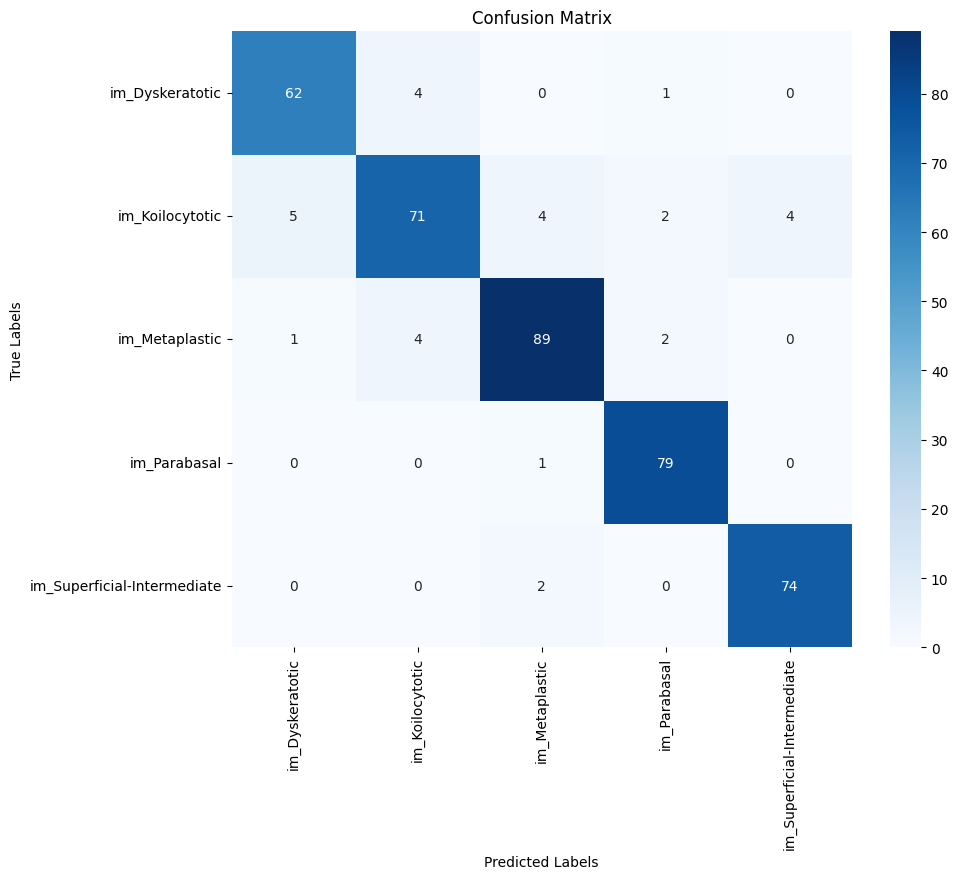

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns

def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels={j: i for i, j in enumerate(categories)})
    print(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

dataset.train = False
test_dataloader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

# Evaluate the trained model
evaluate_model(model, test_dataloader)

# Preprocessing of Dataset
- Otsu Thresholding
- Watershed Segmentation

In [ ]:
base_dir='/content/dataset'
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic",
              "im_Parabasal", "im_Superficial-Intermediate"]
allowed_extensions = {".bmp", ".png", ".jpg", ".jpeg"}


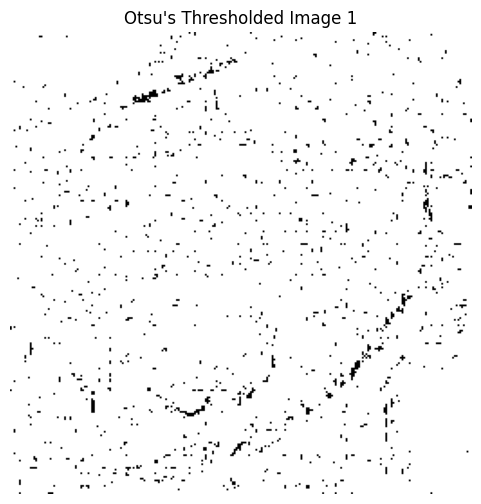

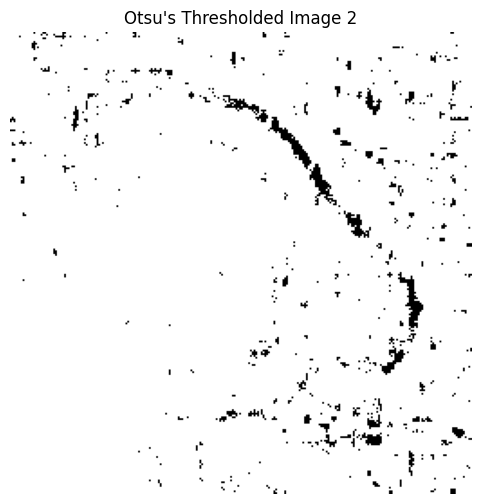

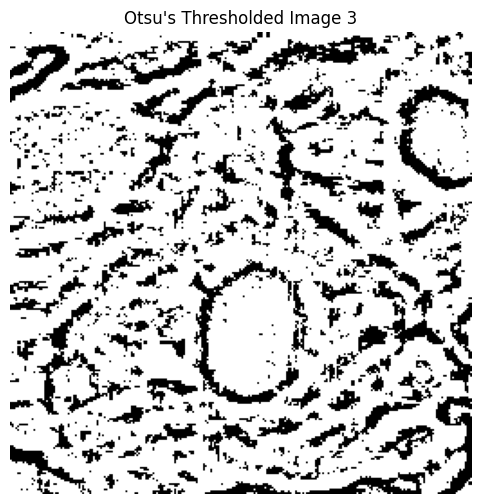

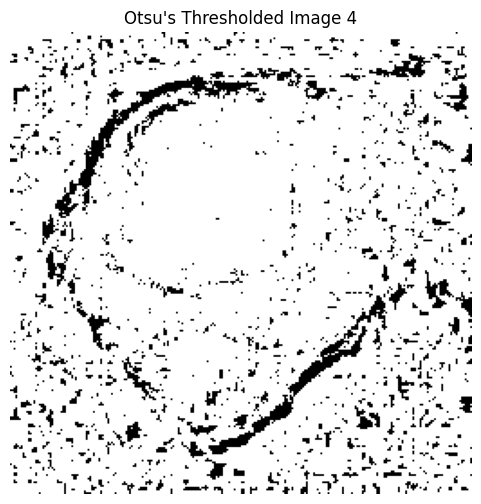

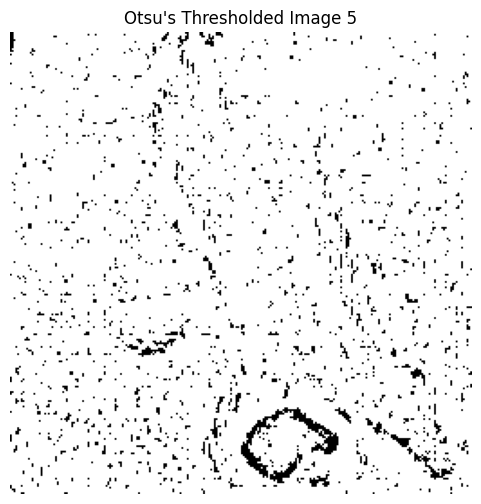

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image

# Initialize lists to store thresholded images and their corresponding labels
otsu_images = []
image_labels = []

# Apply Otsu's Thresholding to each image in the dataset
for category in categories:
    path = os.path.join(base_dir, category, category, "CROPPED")  # Corrected path structure
    img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]

    for img_name in img_names:
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path).convert('RGB')
        img = img.resize((256, 256))
        gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

        th = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
        # Apply Otsu's thresholding
        _, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        otsu_images.append(th)   # Store the thresholded image
        image_labels.append(category)     # Store the label (category name) for this image


# Display the first five Otsu thresholded images
for i, otsu_image in enumerate(otsu_images[:5]):
    plt.figure(figsize=(6, 6))
    plt.imshow(otsu_image, cmap='gray')
    plt.title(f"Otsu's Thresholded Image {i+1}")
    plt.axis('off')
    plt.show()


## Otsu Thresholding

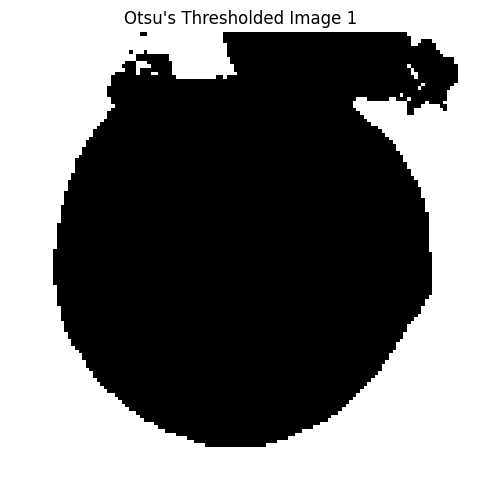

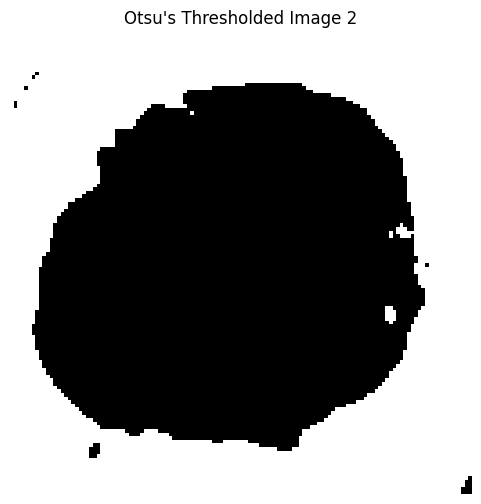

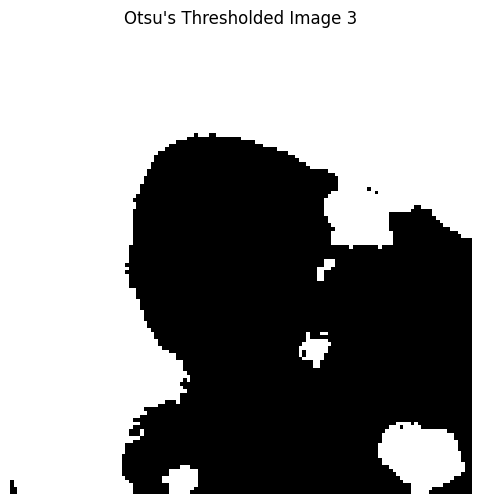

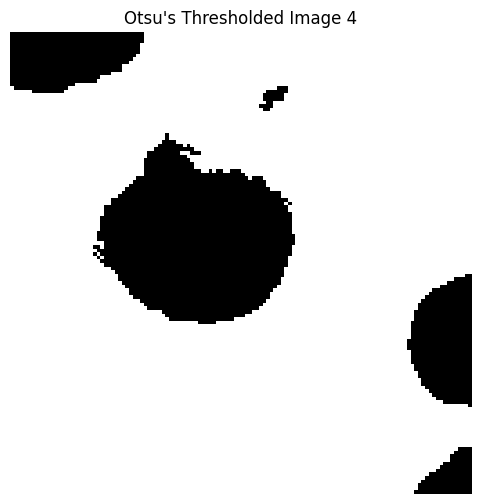

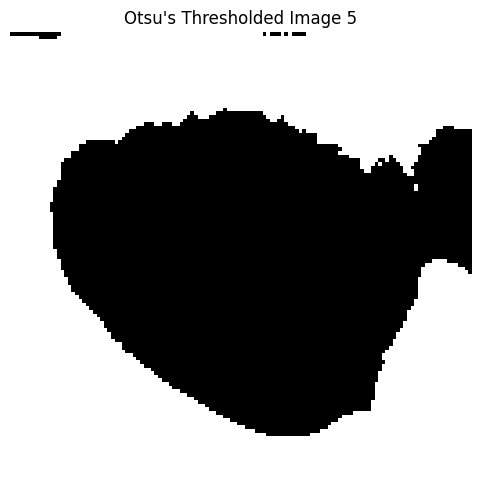

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image

# Initialize lists to store thresholded images and their corresponding labels
otsu_images = []
image_labels = []

# Apply Otsu's Thresholding to each image in the dataset
for category in categories:
    path = os.path.join(base_dir, category, category, "CROPPED")  # Corrected path structure
    img_names = [img_name for img_name in os.listdir(path) if os.path.splitext(img_name)[-1].lower() in allowed_extensions]

    for img_name in img_names:
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path).convert('RGB')
        img = img.resize((128, 128))
        gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

        # Apply Otsu's thresholding
        _, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        otsu_images.append(otsu_thresh)   # Store the thresholded image
        image_labels.append(category)     # Store the label (category name) for this image


# Display the first five Otsu thresholded images
for i, otsu_image in enumerate(otsu_images[:5]):
    plt.figure(figsize=(6, 6))
    plt.imshow(otsu_image, cmap='gray')
    plt.title(f"Otsu's Thresholded Image {i+1}")
    plt.axis('off')
    plt.show()


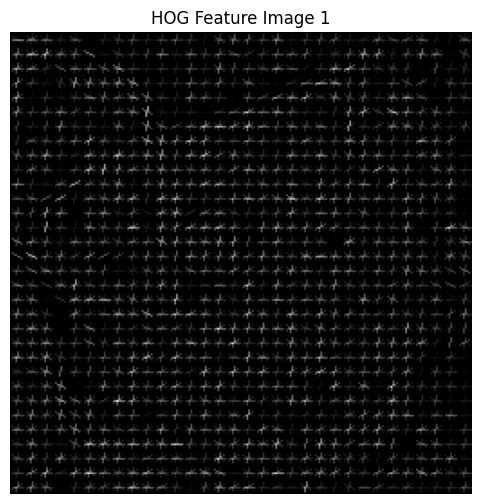

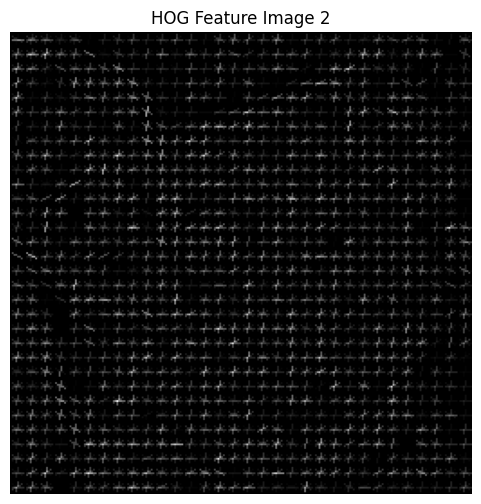

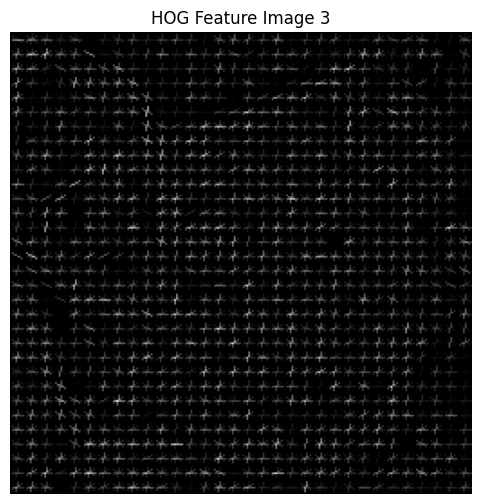

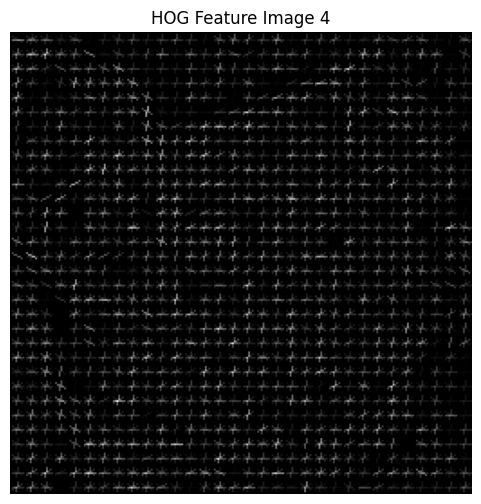

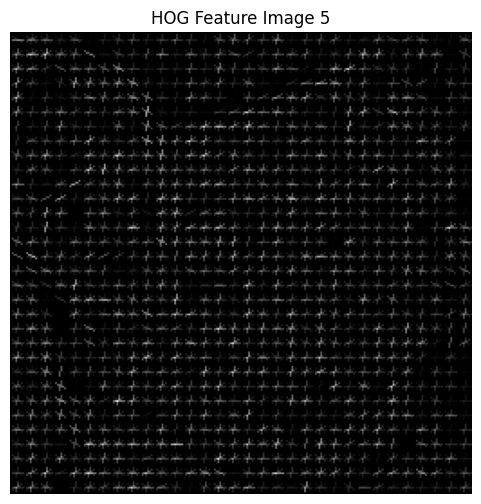

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import numpy as np

# Initialize list to store HOG feature vectors
hog_features = []

# Apply HOG to each watershed segmented image and store the feature vectors
for gray_img in otsu_images:
    # gray_img = cv2.cvtColor(watershed_img, cv2.COLOR_RGB2GRAY)
    hog_feature, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_features.append(hog_feature)  # Store the HOG feature vector

# Display the first five HOG images
for i, watershed_img in enumerate(hog_features[:5]):
    plt.figure(figsize=(6, 6))
    plt.imshow(hog_image, cmap='gray')
    plt.title(f"HOG Feature Image {i+1}")
    plt.axis('off')
    plt.show()

# Convert HOG features to numpy array for ML
X_hog = np.array(hog_features)  # HOG feature matrix for ML classification




## Watershed Segmentation

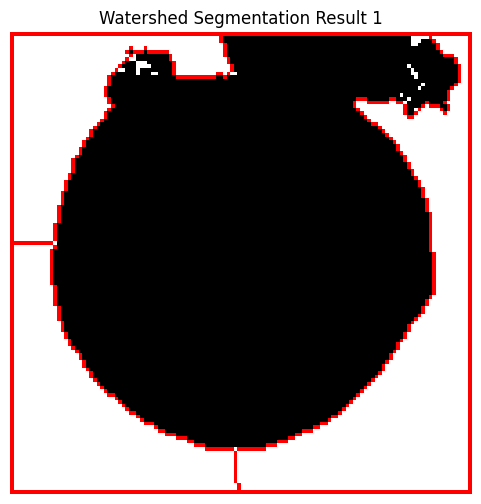

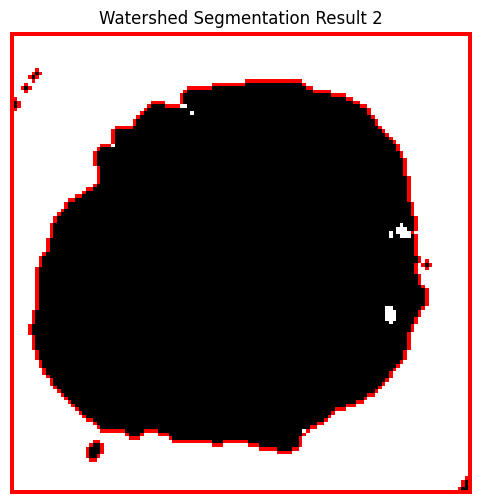

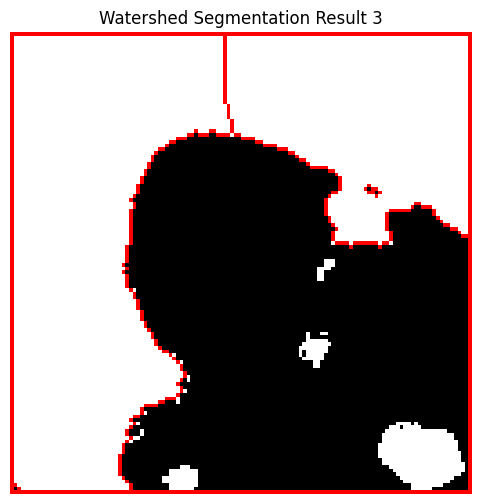

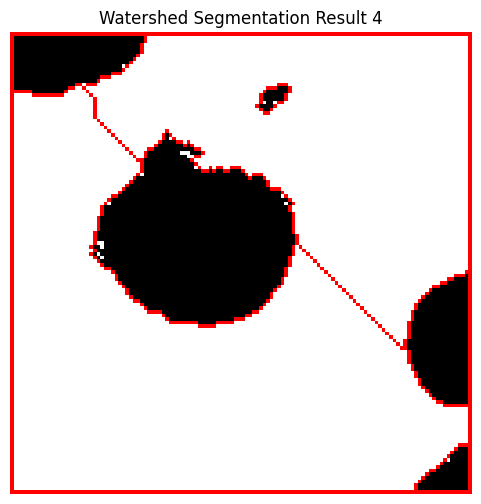

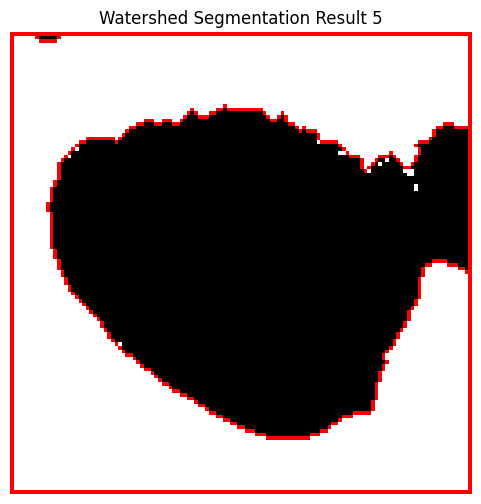

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize list to store watershed segmented images
watershed_images = []

# Apply Watershed Segmentation to each Otsu-thresholded image
for idx, otsu_thresh in enumerate(otsu_images):
    # Step 1: Compute Distance Transform
    dist_transform = cv2.distanceTransform(otsu_thresh, cv2.DIST_L2, 5)

    # Step 2: Threshold the Distance Transform to find markers
    _, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    markers = np.uint8(markers)
    unknown = cv2.subtract(otsu_thresh, markers)

    # Step 3: Label markers for Watershed
    _, markers = cv2.connectedComponents(markers)
    markers = markers + 1  # Ensure background is not zero
    markers[unknown == 255] = 0

    # Step 4: Apply Watershed to the original 3-channel image
    # Convert Otsu-thresholded binary image to 3-channel for visualization in watershed
    img_copy = np.stack([otsu_thresh] * 3, axis=-1)  # Convert to 3-channel image for watershed
    markers = cv2.watershed(img_copy, markers)
    img_copy[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    # Store the segmented image
    watershed_images.append(img_copy)

    # Display the first five watershed results for verification
    if idx < 5:
        plt.figure(figsize=(6, 6))
        plt.imshow(img_copy)
        plt.title(f"Watershed Segmentation Result {idx+1}")
        plt.axis('off')
        plt.show()

# `watershed_images` now contains the segmented images for each input image in `otsu_images`



# Feature Extractors using Segmented Images

## HOG

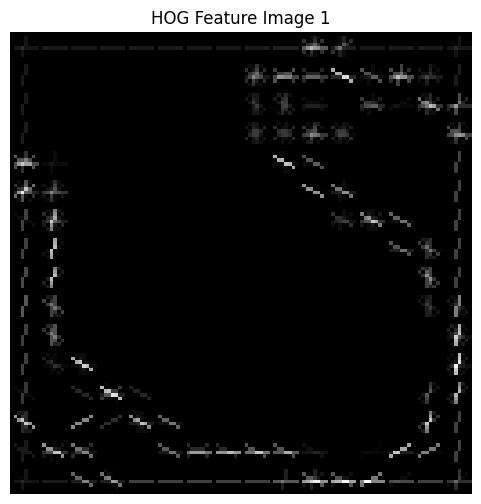

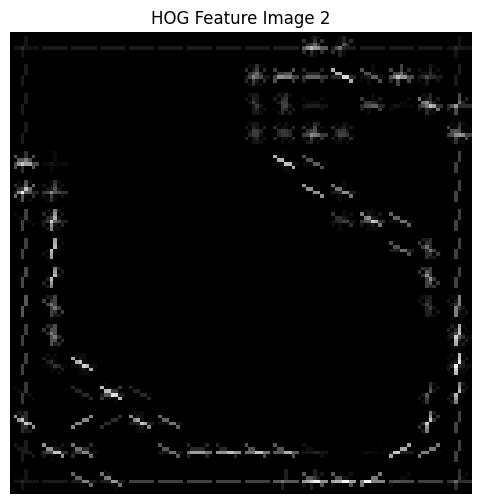

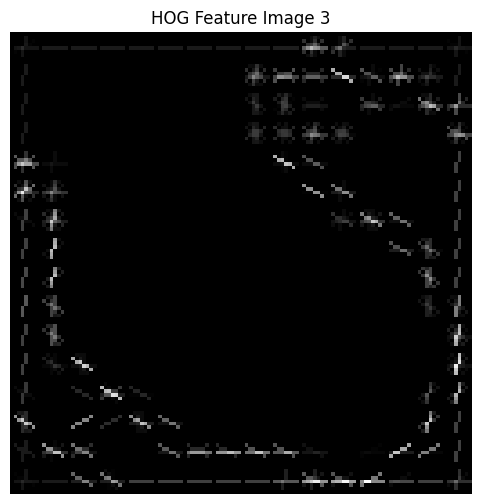

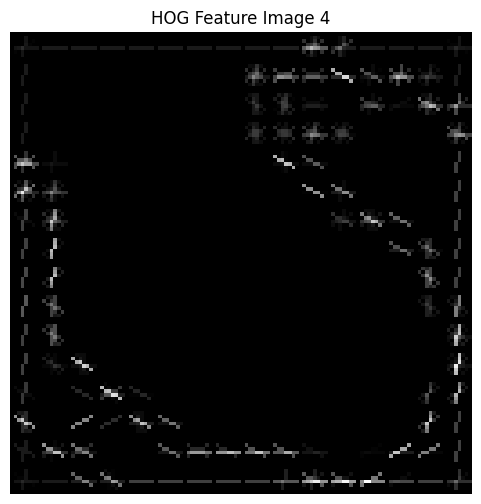

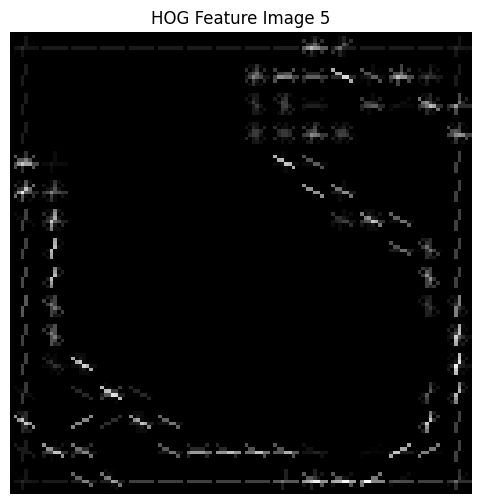

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import numpy as np

# Initialize list to store HOG feature vectors
hog_features = []

# Apply HOG to each watershed segmented image and store the feature vectors
for watershed_img in watershed_images:
    gray_img = cv2.cvtColor(watershed_img, cv2.COLOR_RGB2GRAY)
    hog_feature, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_features.append(hog_feature)  # Store the HOG feature vector

# Display the first five HOG images
for i, watershed_img in enumerate(hog_features[:5]):
    plt.figure(figsize=(6, 6))
    plt.imshow(hog_image, cmap='gray')
    plt.title(f"HOG Feature Image {i+1}")
    plt.axis('off')
    plt.show()

# Convert HOG features to numpy array for ML
X_hog = np.array(hog_features)  # HOG feature matrix for ML classification




## LBP

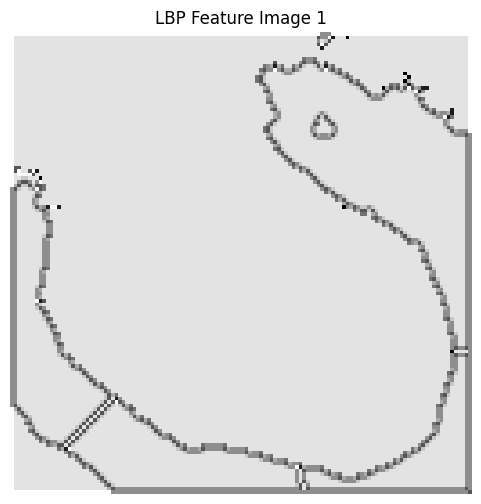

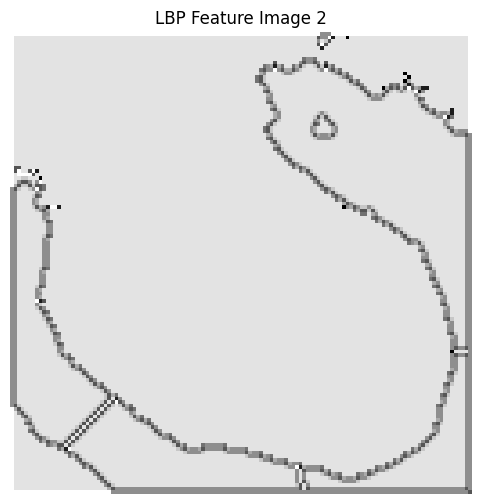

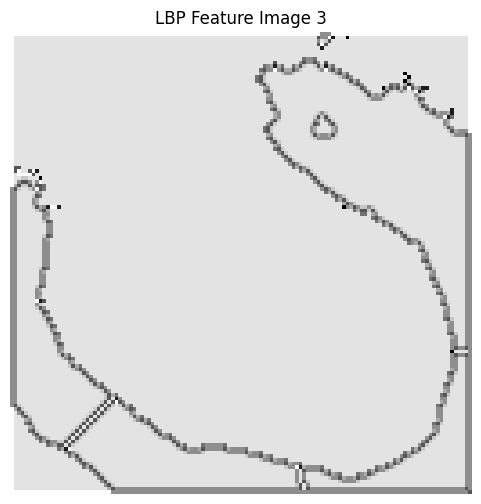

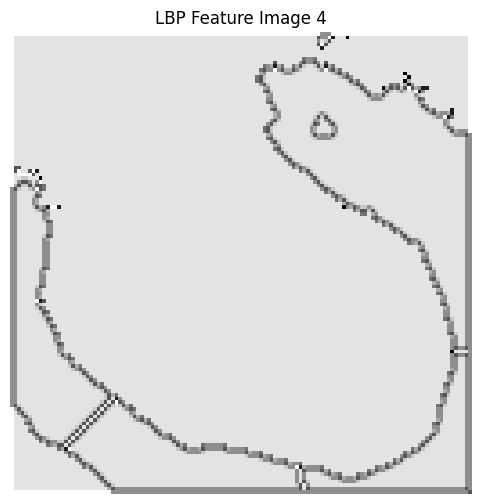

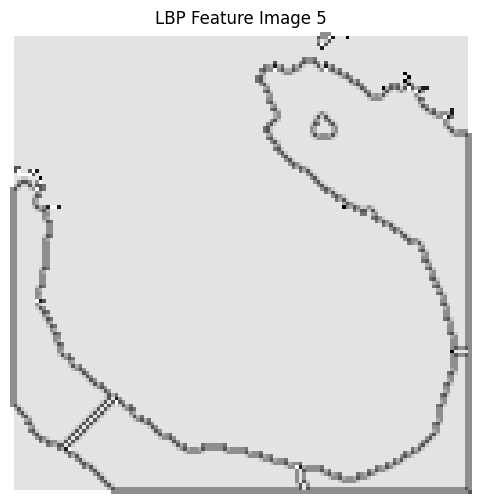

In [ ]:
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import numpy as np

# Parameters for LBP
P = 8  # Number of circularly symmetric neighbor points
R = 1  # Radius of circle

# Initialize list to store LBP feature histograms
lbp_features = []

# Apply LBP to each watershed segmented image and store the histogram as feature vector
for watershed_img in watershed_images:
    gray_img = cv2.cvtColor(watershed_img, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray_img, P, R, method="uniform")
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize histogram
    lbp_features.append(lbp_hist)  # Store histogram

# Display the first five LBP images
for i, watershed_img in enumerate(lbp_features[:5]):
    plt.figure(figsize=(6, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title(f"LBP Feature Image {i+1}")
    plt.axis('off')
    plt.show()

# Convert LBP features to numpy array for ML
X_lbp = np.array(lbp_features)  # LBP feature matrix for ML classification



## SIFT

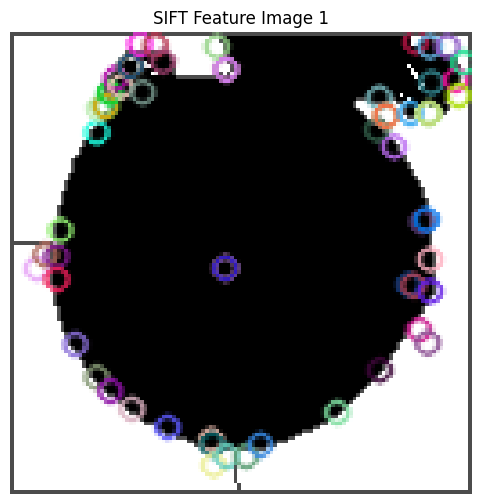

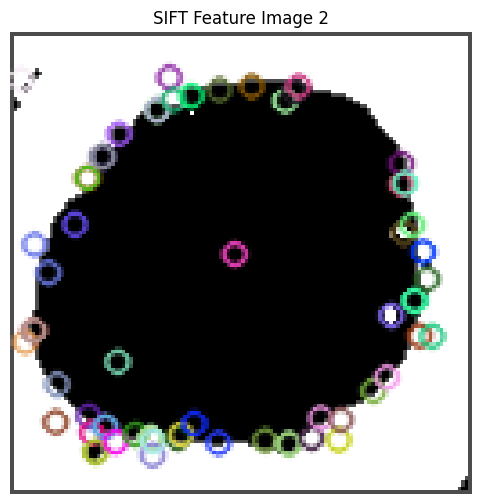

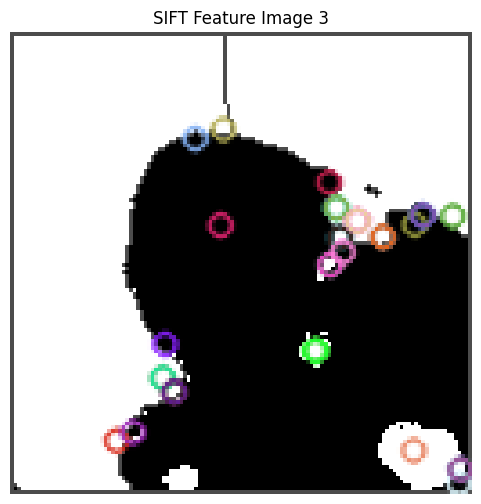

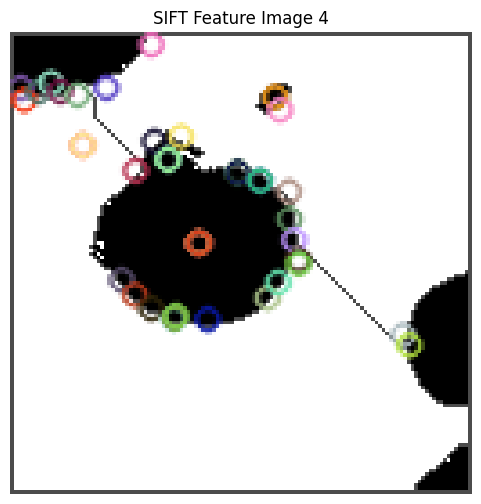

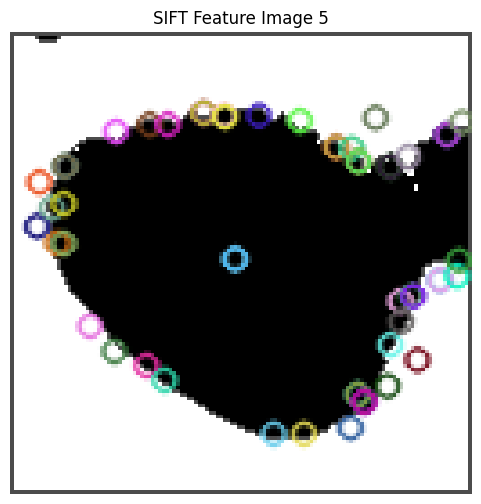

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Initialize list to store SIFT feature descriptors
sift_features = []

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Apply SIFT to each watershed segmented image and store the keypoint descriptors
for watershed_img in watershed_images:
    gray_img = cv2.cvtColor(watershed_img, cv2.COLOR_RGB2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    if descriptors is not None:
        sift_features.append(descriptors.flatten())  # Store flattened descriptors

    # Display the first five SIFT feature images
    if len(sift_features) <= 5:
        sift_img = cv2.drawKeypoints(gray_img, keypoints, None)
        plt.figure(figsize=(6, 6))
        plt.imshow(sift_img, cmap='gray')
        plt.title(f"SIFT Feature Image {len(sift_features)}")
        plt.axis('off')
        plt.show()

# Convert SIFT features to numpy array for ML (standardize length if needed)
X_sift = np.array([f[:1000] if len(f) >= 1000 else np.pad(f, (0, 1000-len(f)), 'constant') for f in sift_features])  # Fixed length



## ORB

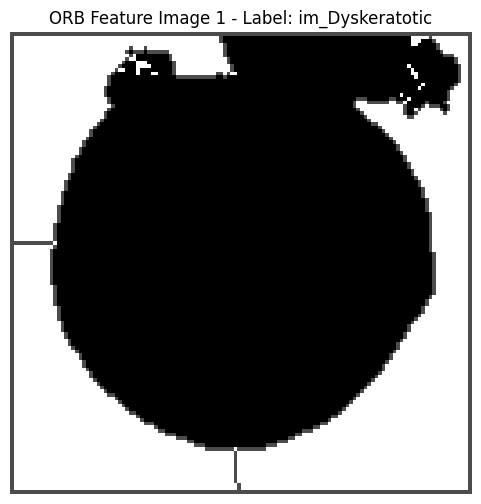

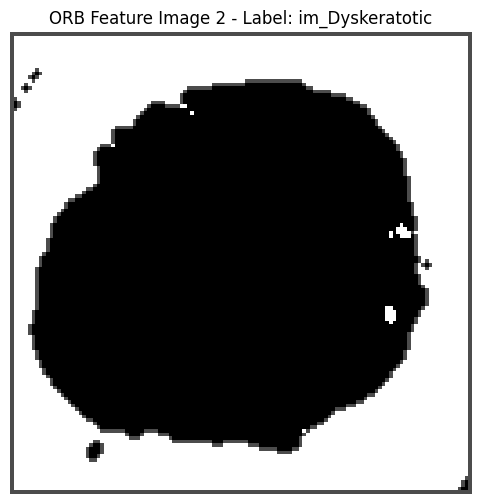

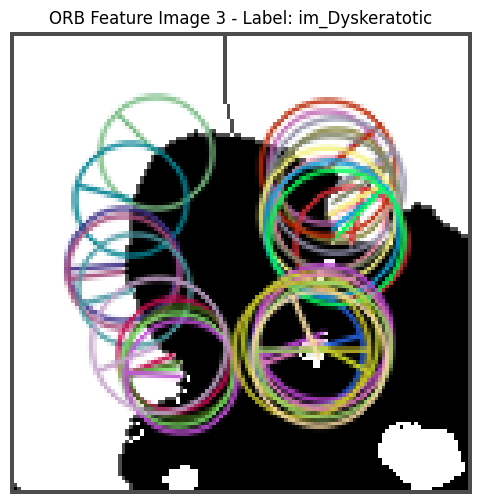

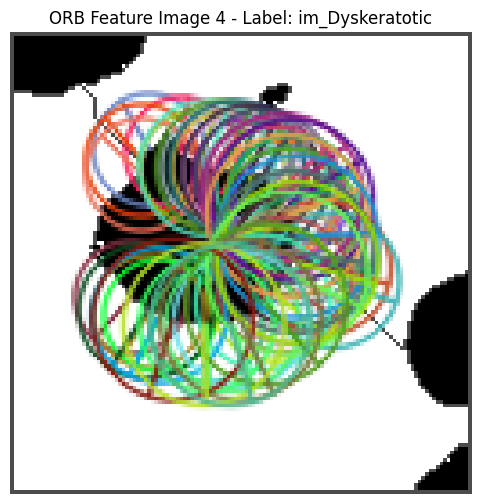

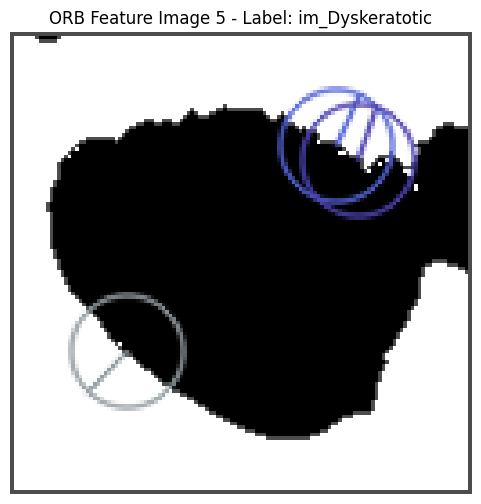

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize list to store ORB feature descriptors and corresponding labels
orb_features = []
filtered_labels = []  # New list for labels matching `orb_features`

# Initialize ORB detector
orb = cv2.ORB_create()

# Extract ORB features and store labels for images with successful feature extraction
for watershed_img, label in zip(watershed_images, image_labels):
    gray_img = cv2.cvtColor(watershed_img, cv2.COLOR_RGB2GRAY)
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)

    if descriptors is not None:
        orb_features.append(descriptors.flatten())  # Store flattened descriptors
        filtered_labels.append(label)  # Store label only if descriptors are available

# Standardize ORB features to fixed length
fixed_length = 500  # Adjust as needed
X_orb = np.array([f[:fixed_length] if len(f) >= fixed_length else np.pad(f, (0, fixed_length - len(f)), 'constant') for f in orb_features])
y_filtered = np.array(filtered_labels)  # Use filtered labels

# Plot the first five ORB feature images with keypoints
for i, (watershed_img, label) in enumerate(zip(watershed_images[:5], filtered_labels[:5])):
    gray_img = cv2.cvtColor(watershed_img, cv2.COLOR_RGB2GRAY)
    keypoints, _ = orb.detectAndCompute(gray_img, None)

    # Draw keypoints on the image
    orb_img = cv2.drawKeypoints(gray_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the image with ORB keypoints
    plt.figure(figsize=(6, 6))
    plt.imshow(orb_img, cmap='gray')
    plt.title(f"ORB Feature Image {i+1} - Label: {label}")
    plt.axis('off')
    plt.show()



## Gabor Filters

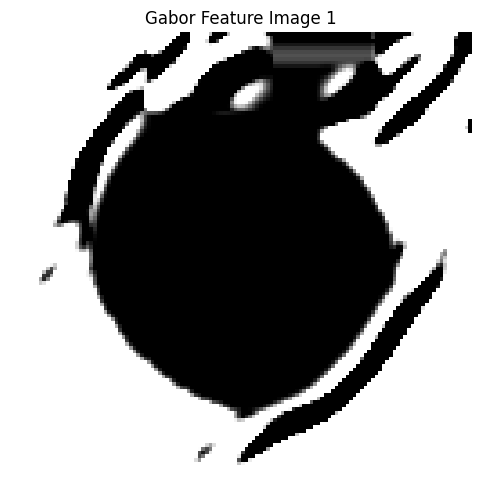

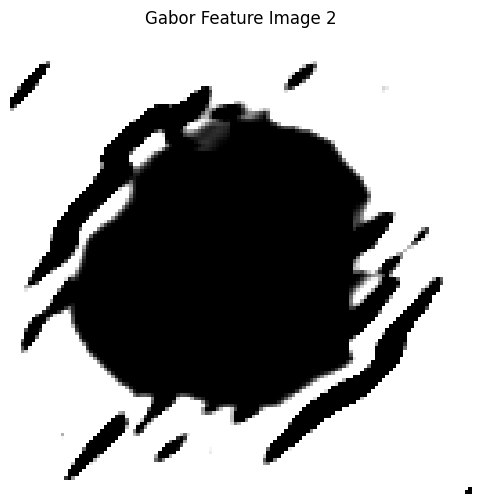

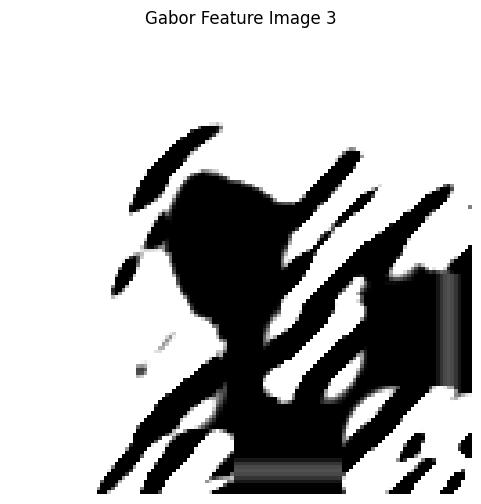

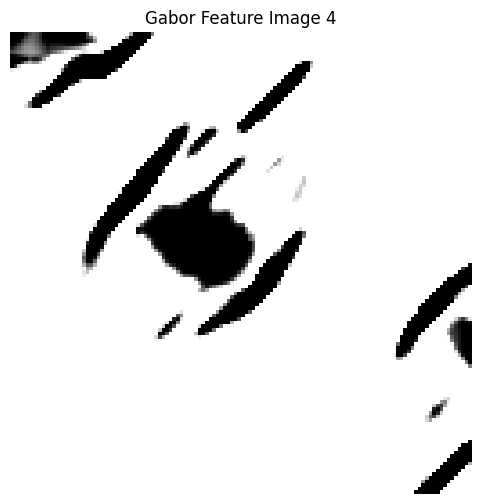

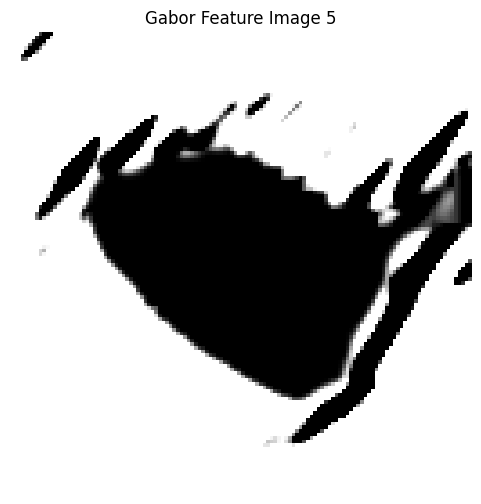

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Gabor filter
ksize = 21  # Kernel size
sigma = 5.0  # Standard deviation of Gaussian function
theta = np.pi / 4  # Orientation
lambd = 10.0  # Wavelength of sinusoidal factor
gamma = 0.5  # Aspect ratio

# Initialize list to store Gabor feature vectors
gabor_features = []

# Apply Gabor filter to each watershed segmented image and store the feature vector
for watershed_img in watershed_images:
    gray_img = cv2.cvtColor(watershed_img, cv2.COLOR_RGB2GRAY)
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)
    gabor_response = cv2.filter2D(gray_img, cv2.CV_8UC3, gabor_kernel)
    gabor_features.append(gabor_response.flatten())  # Store the flattened Gabor response

    # Display the first five Gabor images
    if len(gabor_features) <= 5:
        plt.figure(figsize=(6, 6))
        plt.imshow(gabor_response, cmap='gray')
        plt.title(f"Gabor Feature Image {len(gabor_features)}")
        plt.axis('off')
        plt.show()

# Convert Gabor features to numpy array for ML (standardize length if needed)
X_gabor = np.array([f[:5000] if len(f) >= 5000 else np.pad(f, (0, 5000-len(f)), 'constant') for f in gabor_features])  # Fixed length



# ML Classifiers with Segmented Images

## Classifers with HOG

In [ ]:
# Assuming image_labels contains the label for each image based on its category
# Initialize y using image_labels

y = np.array(image_labels)  # Convert image_labels list to a numpy array for ML use

# Split the data into training and testing sets (using X_hog from HOG feature extraction)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

# Optional: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate and print accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy (HOG): {accuracy_logistic * 100:.2f}%")


Logistic Regression Accuracy (HOG): 53.58%


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (HOG): {accuracy_rf * 100:.2f}%")


Random Forest Accuracy (HOG): 56.91%


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (HOG): {accuracy_svm * 100:.2f}%")


SVM Accuracy (HOG): 63.09%


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (HOG): {accuracy_knn * 100:.2f}%")


KNN Accuracy (HOG): 39.63%


## Classifers with LBP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_lbp contains LBP features and y contains corresponding labels
X_train, X_test, y_train, y_test = train_test_split(X_lbp, y, test_size=0.2, random_state=42)

# Optional: Standardize features for classifiers that benefit from scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate and print accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy (LBP): {accuracy_logistic * 100:.2f}%")



Logistic Regression Accuracy (LBP): 44.69%


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (LBP): {accuracy_rf * 100:.2f}%")



Random Forest Accuracy (LBP): 43.95%


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (LBP): {accuracy_svm * 100:.2f}%")



SVM Accuracy (LBP): 45.93%


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (LBP): {accuracy_knn * 100:.2f}%")



KNN Accuracy (LBP): 40.12%


## Classifers with SIFT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sift, y, test_size=0.2, random_state=42)

# Optional: Standardize features for classifiers that benefit from scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate and print accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy (SIFT): {accuracy_logistic * 100:.2f}%")




Logistic Regression Accuracy (SIFT): 28.64%


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (SIFT): {accuracy_rf * 100:.2f}%")




Random Forest Accuracy (SIFT): 35.43%


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (SIFT): {accuracy_svm * 100:.2f}%")




SVM Accuracy (SIFT): 27.41%


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (SIFT): {accuracy_knn * 100:.2f}%")



KNN Accuracy (SIFT): 25.68%


## Classifers with ORB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_orb, y_filtered, test_size=0.2, random_state=42)

# Optional: Standardize features for classifiers that benefit from scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate and print accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy (ORB): {accuracy_logistic * 100:.2f}%")



Logistic Regression Accuracy (ORB): 34.73%


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (ORB): {accuracy_rf * 100:.2f}%")



Random Forest Accuracy (ORB): 43.26%


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (ORB): {accuracy_svm * 100:.2f}%")




SVM Accuracy (ORB): 34.42%


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (ORB): {accuracy_knn * 100:.2f}%")




KNN Accuracy (ORB): 36.12%


## Classifiers with Gabor Filters

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming `X_gabor` contains the Gabor features and `y` contains the labels
X_train, X_test, y_train, y_test = train_test_split(X_gabor, y, test_size=0.2, random_state=42)

# Optional: Standardize features for classifiers that benefit from scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate and print accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy (Gabor): {accuracy_logistic * 100:.2f}%")


Logistic Regression Accuracy (Gabor): 31.36%


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (Gabor): {accuracy_rf * 100:.2f}%")


Random Forest Accuracy (Gabor): 39.63%


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (Gabor): {accuracy_svm * 100:.2f}%")


SVM Accuracy (Gabor): 29.75%


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (Gabor): {accuracy_knn * 100:.2f}%")


KNN Accuracy (Gabor): 34.69%
